## Evaluating Factors Affecting Housing Prices
### Problem Statement:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
### Approach and steps taken:
1.   Importing modules, Reading the data
2.   Analyzing Numerical Features
    *   Checking Statistical summary
    *   Checking Distribution of numerical features
    *   Outlier Treatment
    *   Inspecting Correlation
    *   Missing Value Handling
    *   Extracting new features and drop redundant ones
    *   Correcting datatype
    *   Univaritate and Bivariate Analysis, Data Visualization
3.  Analyzing Categorical Features
    *   Missing Value Handling
    *   Encoding Categorical Features
    *   Data Visualization
    *   Dropping Redundant Features
4.  Splitting data into Train and Test data
    *   Transformation of Target Variable
    *   Imputing Missing Values
    *   Feature Scaling
5.  Primary Feature Selection using RFE
6.  Ridge Regression
7.  Lasso Regression
8.  Comparing model coefficients
9.  Model Evaluation 
10. Choosing the final model and most significant features.

In [569]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [570]:
raw_data = pd.read_csv("train.csv")
raw_data.head(32)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   
25  26          20       RL        110.0    14230   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
27  28          20       RL         98.0    11478   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   
29  30          30       RM         60.0     6324   Pave   NaN      IR1   
30  31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31  32          20       RL          NaN     8544   Pave   NaN      IR1   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5          Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7          Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
10         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
11         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
12         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
13         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
14         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
15         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
16         Lvl    AllPub  ...        0    NaN    NaN        Shed     700   
17         Lvl    AllPub  ...        0    NaN    NaN        Shed     500   
18         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
19      

In [572]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [573]:
raw_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [574]:
raw_data.shape

(1460, 81)

## Data Cleaning

In [575]:
# Remove Id column
# raw_data = raw_data.drop('Id', axis = 1)
# raw_data.head()

In [576]:
numeric_df = raw_data.select_dtypes(include=['int64', 'float64'])
numeric_columns = numeric_df.columns.tolist()
non_numeric_df = raw_data.select_dtypes(include=['object'])
non_numeric_columns = non_numeric_df.columns.to_list()
print(numeric_columns)
print(non_numeric_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gara

In [577]:
for colum in non_numeric_columns:
    print(raw_data[colum].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker   

In [578]:
raw_data['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [579]:
raw_data['LotFrontage'].quantile(0.99)

141.0

In [580]:
# Check how many numerical columns have outliers
outlier_per = {}
for colum in numeric_columns:
    iqr = raw_data[colum].quantile(.75) - raw_data[colum].quantile(.25)
    outliers = raw_data[(raw_data[colum] > raw_data[colum].quantile(.75) + iqr*1.5) | (raw_data[colum] < raw_data[colum].quantile(.25) - iqr*1.5)].shape[0]
    outlier_per[colum] = (outliers/raw_data.shape[0])*100
df = pd.DataFrame({'Features':list(outlier_per.keys()), 'Percentage': list(outlier_per.values())})
df.sort_values(by='Percentage', ascending=False)

Features  Percentage
30  EnclosedPorch   14.246575
10     BsmtFinSF2   11.438356
5     OverallCond    8.561644
32    ScreenPorch    7.945205
1      MSSubClass    7.054795
8      MasVnrArea    6.575342
2     LotFrontage    6.027397
18   BsmtHalfBath    5.616438
29    OpenPorchSF    5.273973
3         LotArea    4.726027
22   KitchenAbvGr    4.657534
12    TotalBsmtSF    4.178082
37      SalePrice    4.178082
34        MiscVal    3.561644
21   BedroomAbvGr    2.397260
28     WoodDeckSF    2.191781
16      GrLivArea    2.123288
23   TotRmsAbvGrd    2.054795
11      BsmtUnfSF    1.986301
15   LowQualFinSF    1.780822
31      3SsnPorch    1.643836
27     GarageArea    1.438356
13       1stFlrSF    1.369863
9      BsmtFinSF1    0.479452
33       PoolArea    0.479452
6       YearBuilt    0.479452
24     Fireplaces    0.342466
26     GarageCars    0.342466
14       2ndFlrSF    0.136986
4     OverallQual    0.136986
17   BsmtFullBath    0.068493
35         MoSold    0.000000
36         YrSold    0.000000
0              Id    0.000000
25    GarageYrBlt    0.000000
20       HalfBath    0.000000
7    YearRemodAdd    0.000000
19       FullBath    0.000000

#### Observations
Clearly, a lot of columns have outliers. Removing outliers will cause too much loss of data</br>
Reassigning values outside inter quartile range as maximum or minimum</br>

In [581]:
for feature,percentage in outlier_per.items():
    if feature!='SalePrice':
        IQR = raw_data[feature].quantile(.75) - raw_data[feature].quantile(.25) 
        max_value = raw_data[feature].quantile(.75)+1.5*IQR
        min_value = raw_data[feature].quantile(.25)-1.5*IQR
        raw_data[feature][raw_data[feature] > max_value] = max_value
        raw_data[feature][raw_data[feature] < min_value ] = min_value

In [582]:
# check dataset after outlier removal
raw_data.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000   1460.000000  1460.000000   
mean    730.500000    55.085616    69.134888   9647.388014     6.100685   
std     421.610009    37.508183    19.662022   3594.356399     1.378430   
min       1.000000    20.000000    27.500000   1481.500000     2.000000   
25%     365.750000    20.000000    59.000000   7553.500000     5.000000   
50%     730.500000    50.000000    69.000000   9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000  11601.500000     7.000000   
max    1460.000000   145.000000   111.500000  17673.500000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.543493  1971.299315   1984.865753    90.192149   439.997517  ...   
std       0.963696    30.108397     20.645407   134.925253   433.219435  ...   
min       3.500000  1885.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       7.500000  2010.000000   2010.000000   415.000000  1780.625000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000         1460.0     1460.0       1460.0   
mean     91.806849    42.603425            0.0        0.0          0.0   
std     116.658120    52.501584            0.0        0.0          0.0   
min       0.000000     0.000000            0.0        0.0          0.0   
25%       0.000000     0.000000            0.0        0.0          0.0   
50%       0.000000    25.000000            0.0        0.0          0.0   
75%     168.000000    68.000000            0.0        0.0          0.0   
max     420.000000   170.000000            0.0        0.0          0.0   

       PoolArea  MiscVal       MoSold       YrSold      SalePrice  
count    1460.0   1460.0  1460.000000  1460.000000    1460.000000  
mean        0.0      0.0     6.321918  2007.815753  180921.195890  
std         0.0      0.0     2.703626     1.328095   79442.502883  
min         0.0      0.0     1.000000  2006.000000   34900.000000  
25%         0.0      0.0     5.000000  2007.000000  129975.000000  
50%         0.0      0.0     6.000000  2008.000000  163000.000000  
75%         0.0      0.0     8.000000  2009.000000  214000.000000  
max         0.0      0.0    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

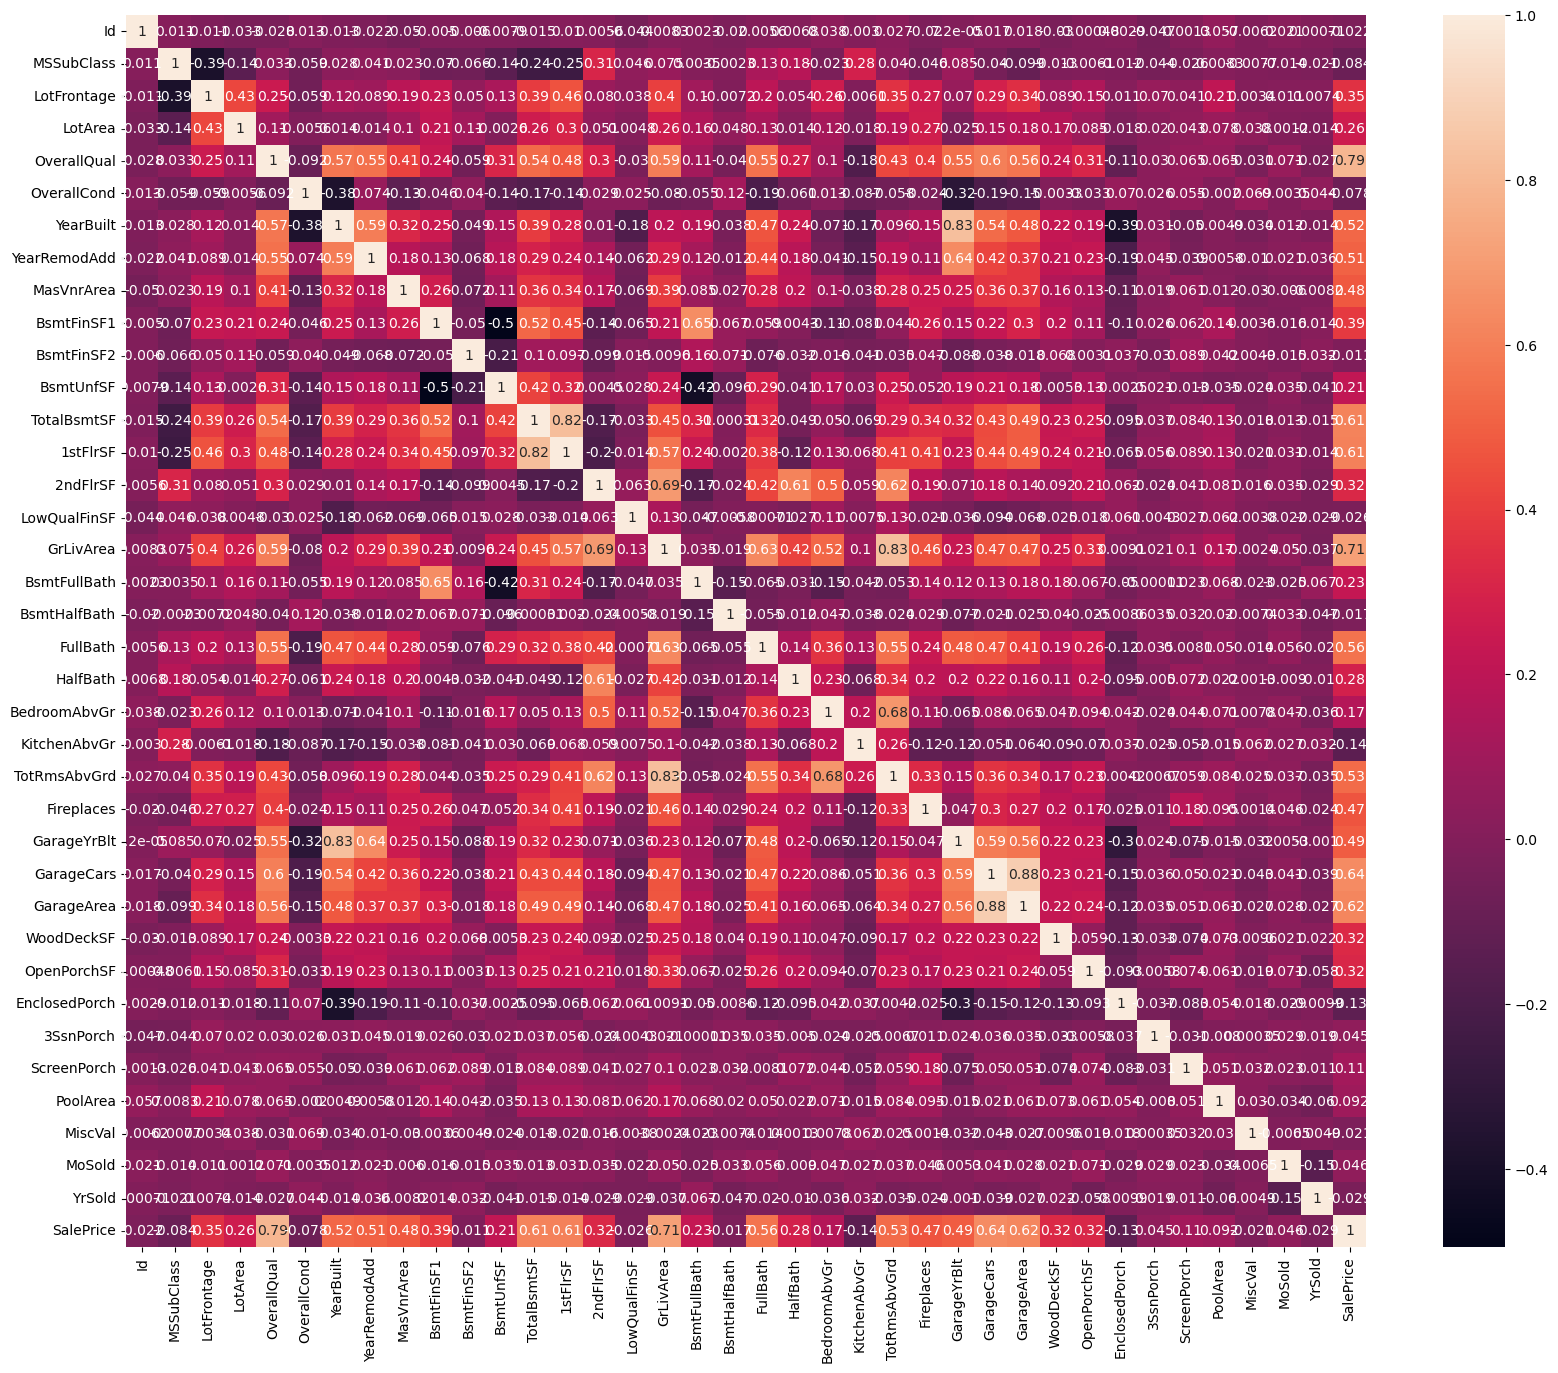

In [583]:
# Check Correlation in numerical data
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

#### Features with high correlation
GarageYrBlt and YearBuilt - 0.83 </br>
TotRmsAbvGrd and GrLivArea - 0.83 </br>
TotalBsmtSF and 1stflrSF - 0.82 </br>
GarageCars and GarageArea - 0.88 </br>

We will drop one feature each from these pairs

#### Numerical Features Univariate Analysis

#### Numerical features with continuous values

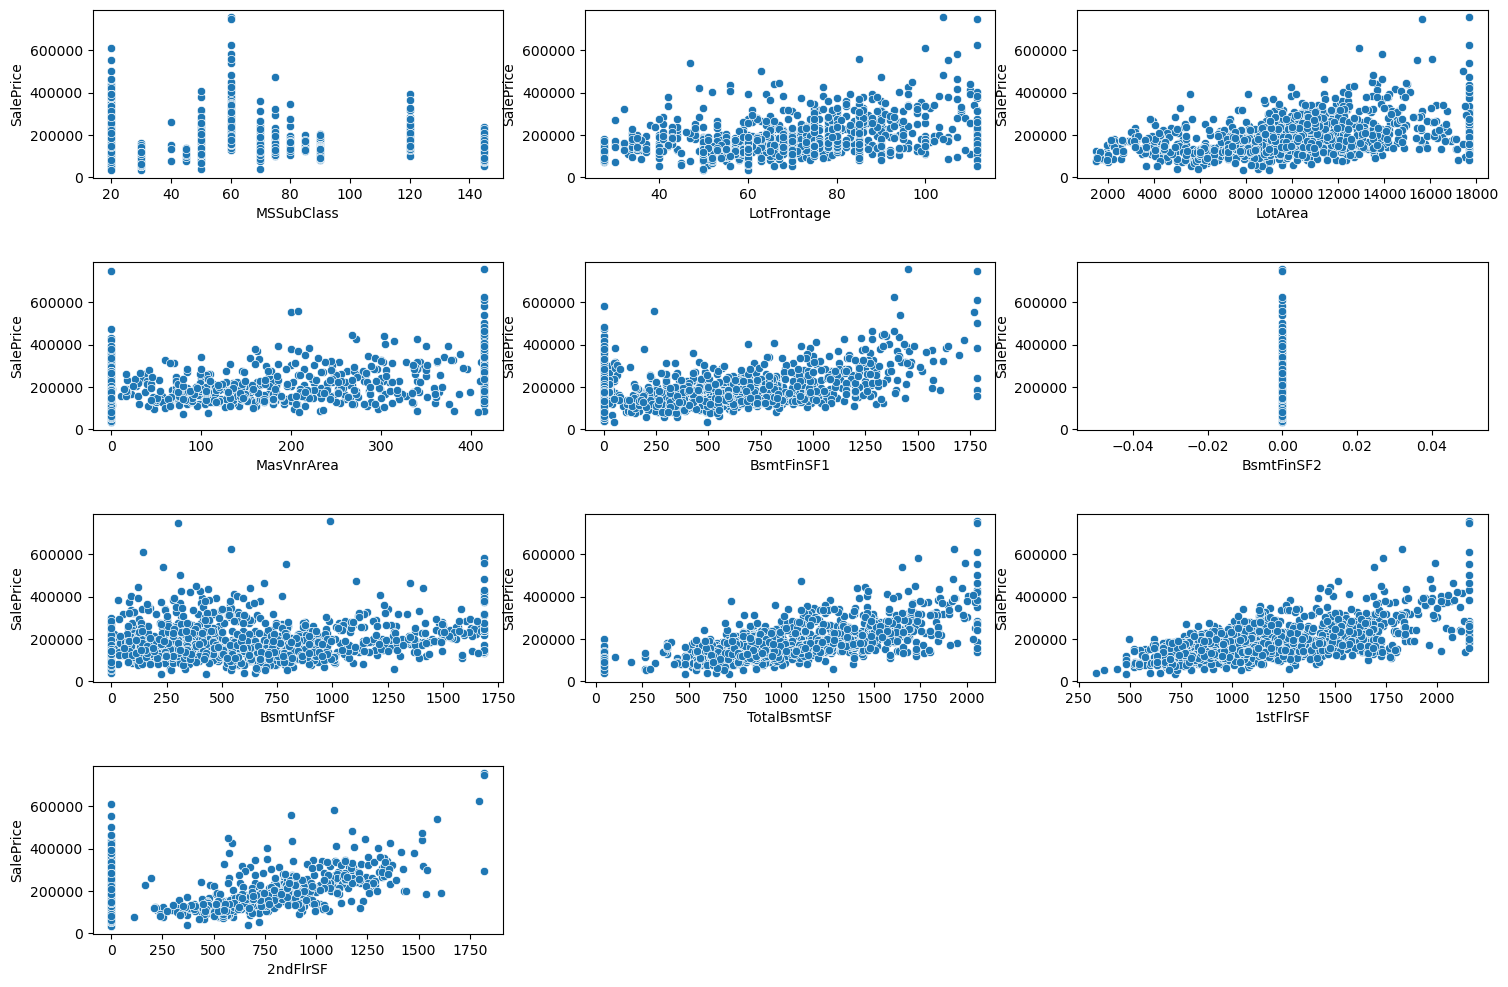

In [584]:
selected_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']

# Calculate the number of subplots needed
num_features = len(selected_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3*num_rows))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.scatterplot(data=raw_data, x=feature, y='SalePrice', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

# Hide unused subplots
for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Observations
Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.</br>
BsmtFinSF2 has single value and can be dropped</br>
MSSubClass has discreet values</br>

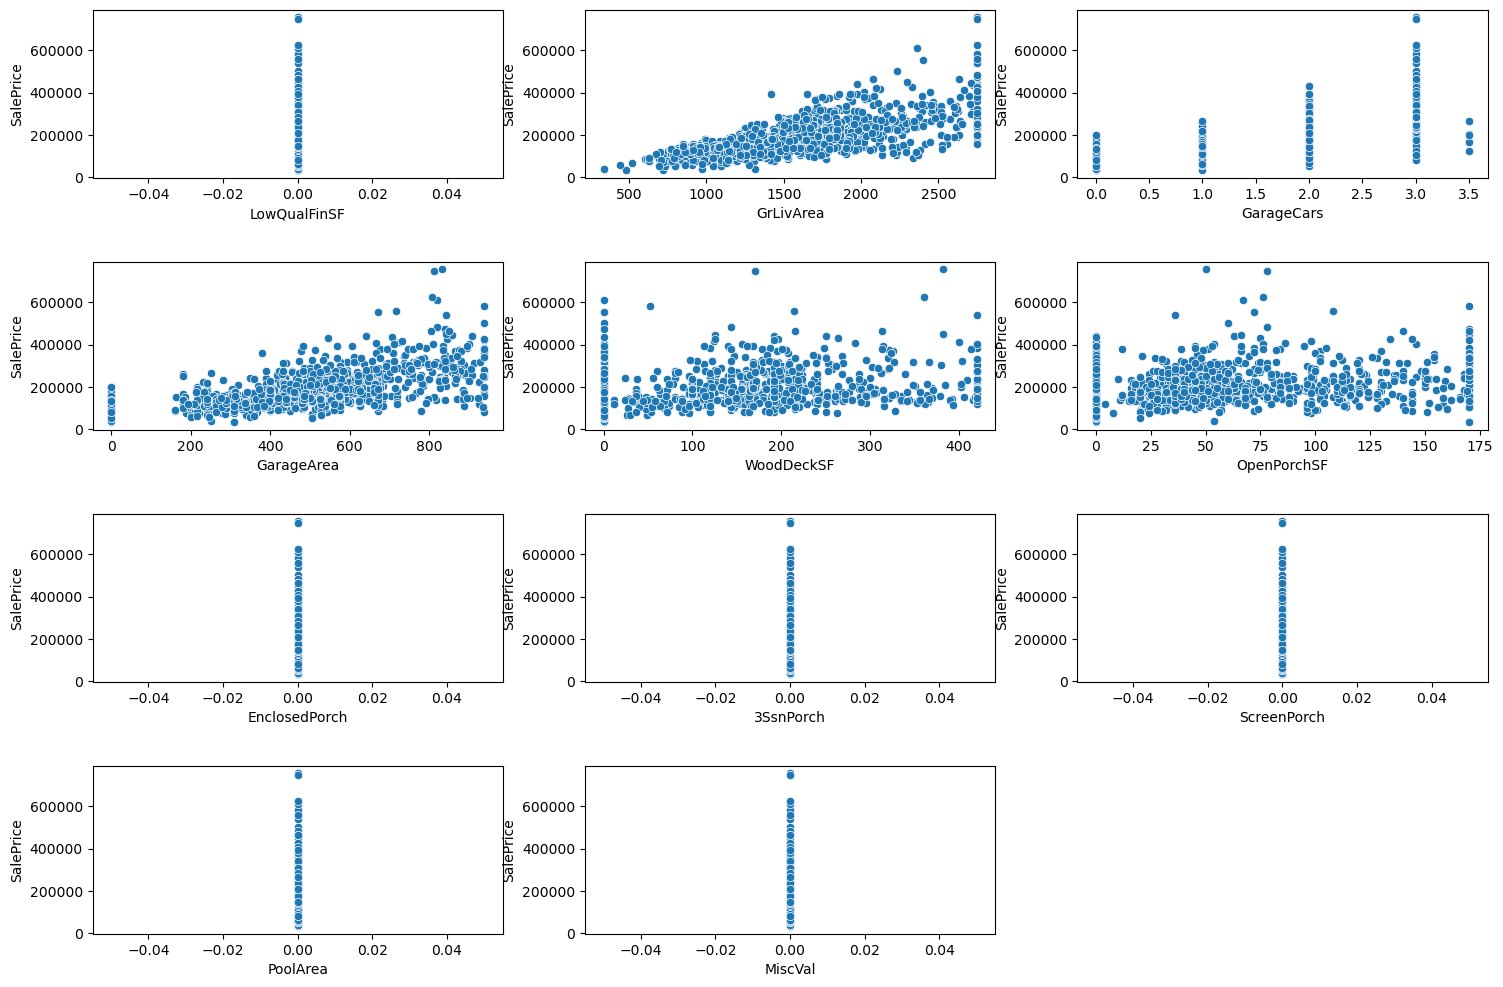

In [585]:
selected_features = ['LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# Calculate the number of subplots needed
num_features = len(selected_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3*num_rows))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.scatterplot(data=raw_data, x=feature, y='SalePrice', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

# Hide unused subplots
for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Observations
GirLivArea, GarageArea show positive correlation with Sale Price</br>
LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.</br>
GarageCars has discreet values</br>

#### Checking distribution of numeric features

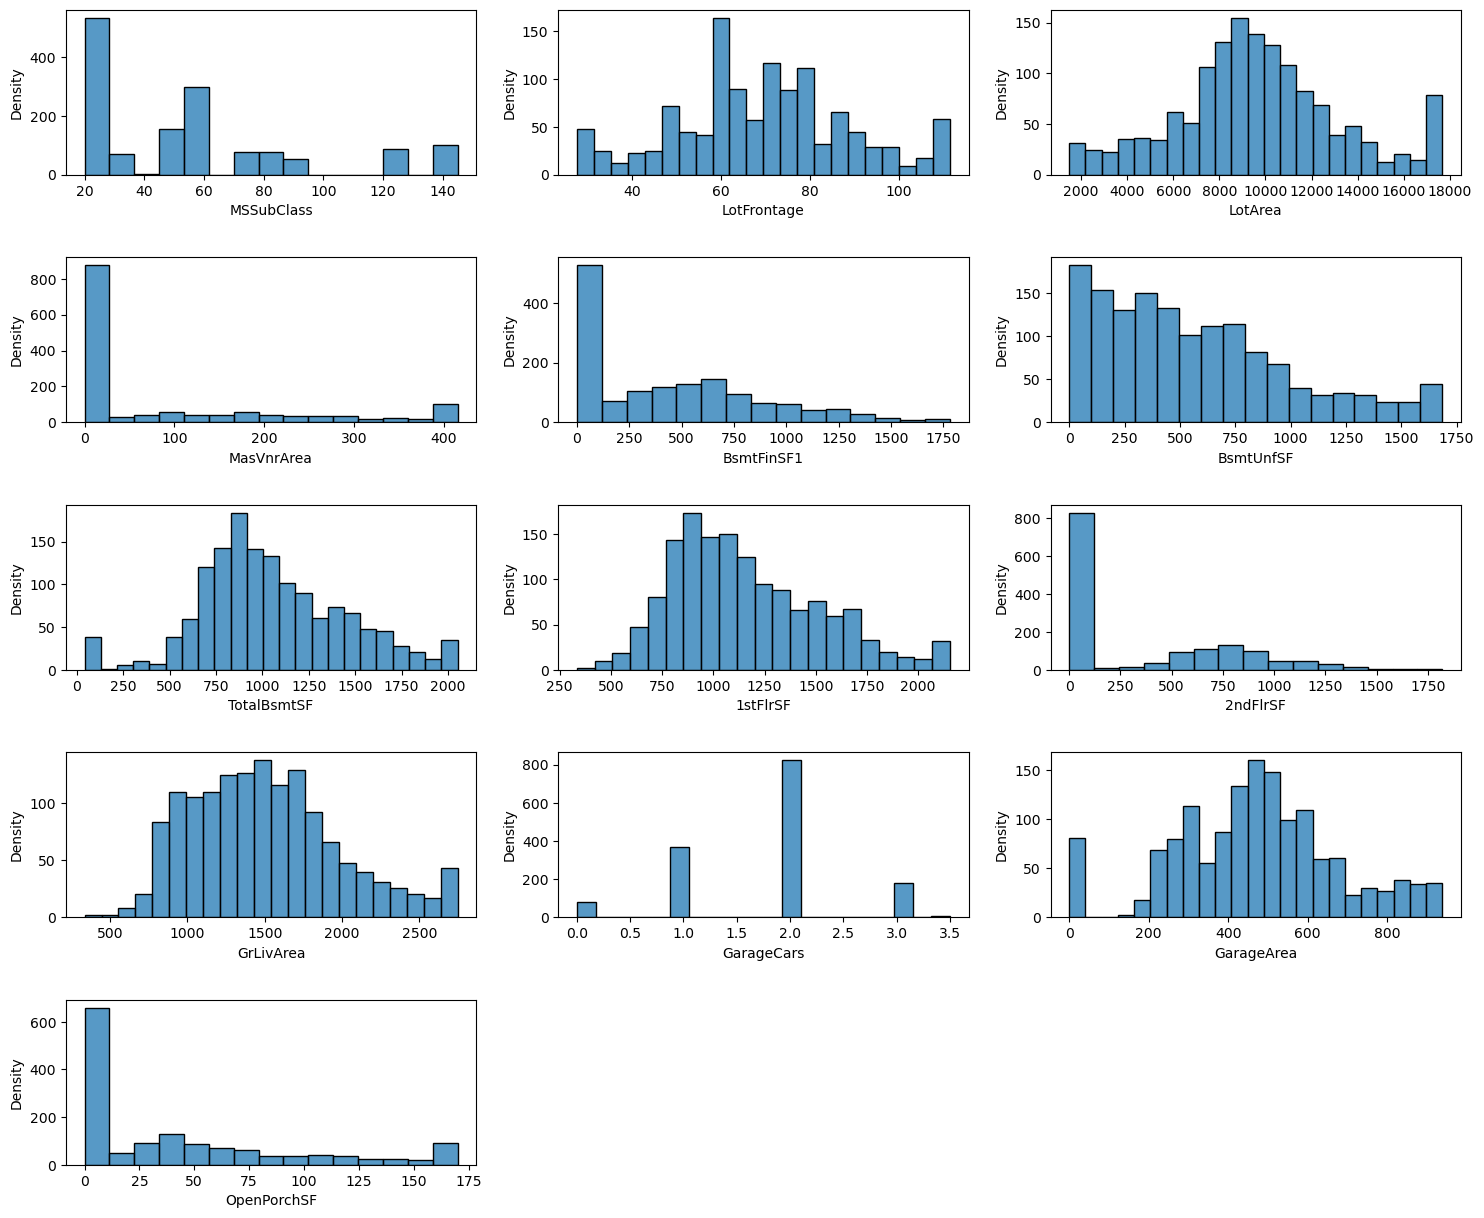

In [586]:
selected_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']

# Calculate the number of subplots needed
num_features = len(selected_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3*num_rows))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.histplot(raw_data[feature], ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

# Hide unused subplots
for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.subplots_adjust(hspace=0.5)
plt.show()

In [587]:
raw_data[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

LowQualFinSF    GrLivArea   GarageCars   GarageArea   WoodDeckSF  \
count        1460.0  1460.000000  1460.000000  1460.000000  1460.000000   
mean            0.0  1503.735873     1.765411   470.670719    91.806849   
std             0.0   481.375641     0.742753   207.105729   116.658120   
min             0.0   334.000000     0.000000     0.000000     0.000000   
25%             0.0  1129.500000     1.000000   334.500000     0.000000   
50%             0.0  1464.000000     2.000000   480.000000     0.000000   
75%             0.0  1776.750000     2.000000   576.000000   168.000000   
max             0.0  2747.625000     3.500000   938.250000   420.000000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  
count  1460.000000         1460.0     1460.0       1460.0    1460.0   1460.0  
mean     42.603425            0.0        0.0          0.0       0.0      0.0  
std      52.501584            0.0        0.0          0.0       0.0      0.0  
min       0.000000            0.0        0.0          0.0       0.0      0.0  
25%       0.000000            0.0        0.0          0.0       0.0      0.0  
50%      25.000000            0.0        0.0          0.0       0.0      0.0  
75%      68.000000            0.0        0.0          0.0       0.0      0.0  
max     170.000000            0.0        0.0          0.0       0.0      0.0

In [588]:
# Removing columns with single value
raw_data[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

LowQualFinSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal
count        1460.0         1460.0     1460.0       1460.0    1460.0   1460.0
mean            0.0            0.0        0.0          0.0       0.0      0.0
std             0.0            0.0        0.0          0.0       0.0      0.0
min             0.0            0.0        0.0          0.0       0.0      0.0
25%             0.0            0.0        0.0          0.0       0.0      0.0
50%             0.0            0.0        0.0          0.0       0.0      0.0
75%             0.0            0.0        0.0          0.0       0.0      0.0
max             0.0            0.0        0.0          0.0       0.0      0.0

In [589]:
raw_data.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

#### Analyzing Numerical Features with Discrete Values

In [590]:
raw_data[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

OverallQual  OverallCond  MoSold  YrSold  BsmtFullBath  BsmtHalfBath  \
0               7          5.0       2    2008           1.0             0   
1               6          7.5       5    2007           0.0             0   
2               7          5.0       9    2008           1.0             0   
3               7          5.0       2    2006           1.0             0   
4               8          5.0      12    2008           1.0             0   
5               5          5.0      10    2009           1.0             0   
6               8          5.0       8    2007           1.0             0   
7               7          6.0      11    2009           1.0             0   
8               7          5.0       4    2008           0.0             0   
9               5          6.0       1    2008           1.0             0   
10              5          5.0       2    2008           1.0             0   
11              9          5.0       7    2006           1.0             0   
12              5          6.0       9    2008           1.0             0   
13              7          5.0       8    2007           0.0             0   
14              6          5.0       5    2008           1.0             0   
15              7          7.5       7    2007           0.0             0   
16              6          7.0       3    2010           1.0             0   
17              4          5.0      10    2006           0.0             0   
18              5          5.0       6    2008           1.0             0   
19              5          6.0       5    2009           0.0             0   
20              8          5.0      11    2006           0.0             0   
21              7          7.0       6    2007           0.0             0   
22              8          5.0       9    2008           0.0             0   
23              5          7.0       6    2007           1.0             0   
24              5          7.5       5    2010           1.0             0   
25              8          5.0       7    2009           0.0             0   
26              5          7.0       5    2010           0.0             0   
27              8          5.0       5    2010           1.0             0   
28              5          6.0      12    2006           1.0             0   
29              4          6.0       5    2008           0.0             0   
30              4          4.0       7    2008           0.0             0   
31              5          6.0       6    2008           0.0             0   
32              8          5.0       1    2008           0.0             0   
33              5          5.0       4    2010           0.0             0   
34              9          5.0       8    2007           1.0             0   
35              8          5.0       9    2006           0.0             0   
36              5          5.0       6    2009           0.0             0   
37              5          6.0      10    2009           0.0             0   
38              5          7.0       1    2010           1.0             0   
39              4          5.0       6    2008           0.0             0   
40              6          5.0      12    2006           0.0             0   
41              5          6.0       7    2007           0.0             0   
42              5          7.0      12    2007           1.0             0   
43              5          6.0       7    2008           1.0             0   
44              5          6.0       5    2006           1.0             0   
45              9          5.0       2    2010           1.0             0   
46              7          5.0       8    2009           1.0             0   
47              8          5.0       7    2007           0.0             0   
48              4          5.0       6    2009           0.0             0   
49              5          7.0       1    2007           1.0             0   
50              6          6

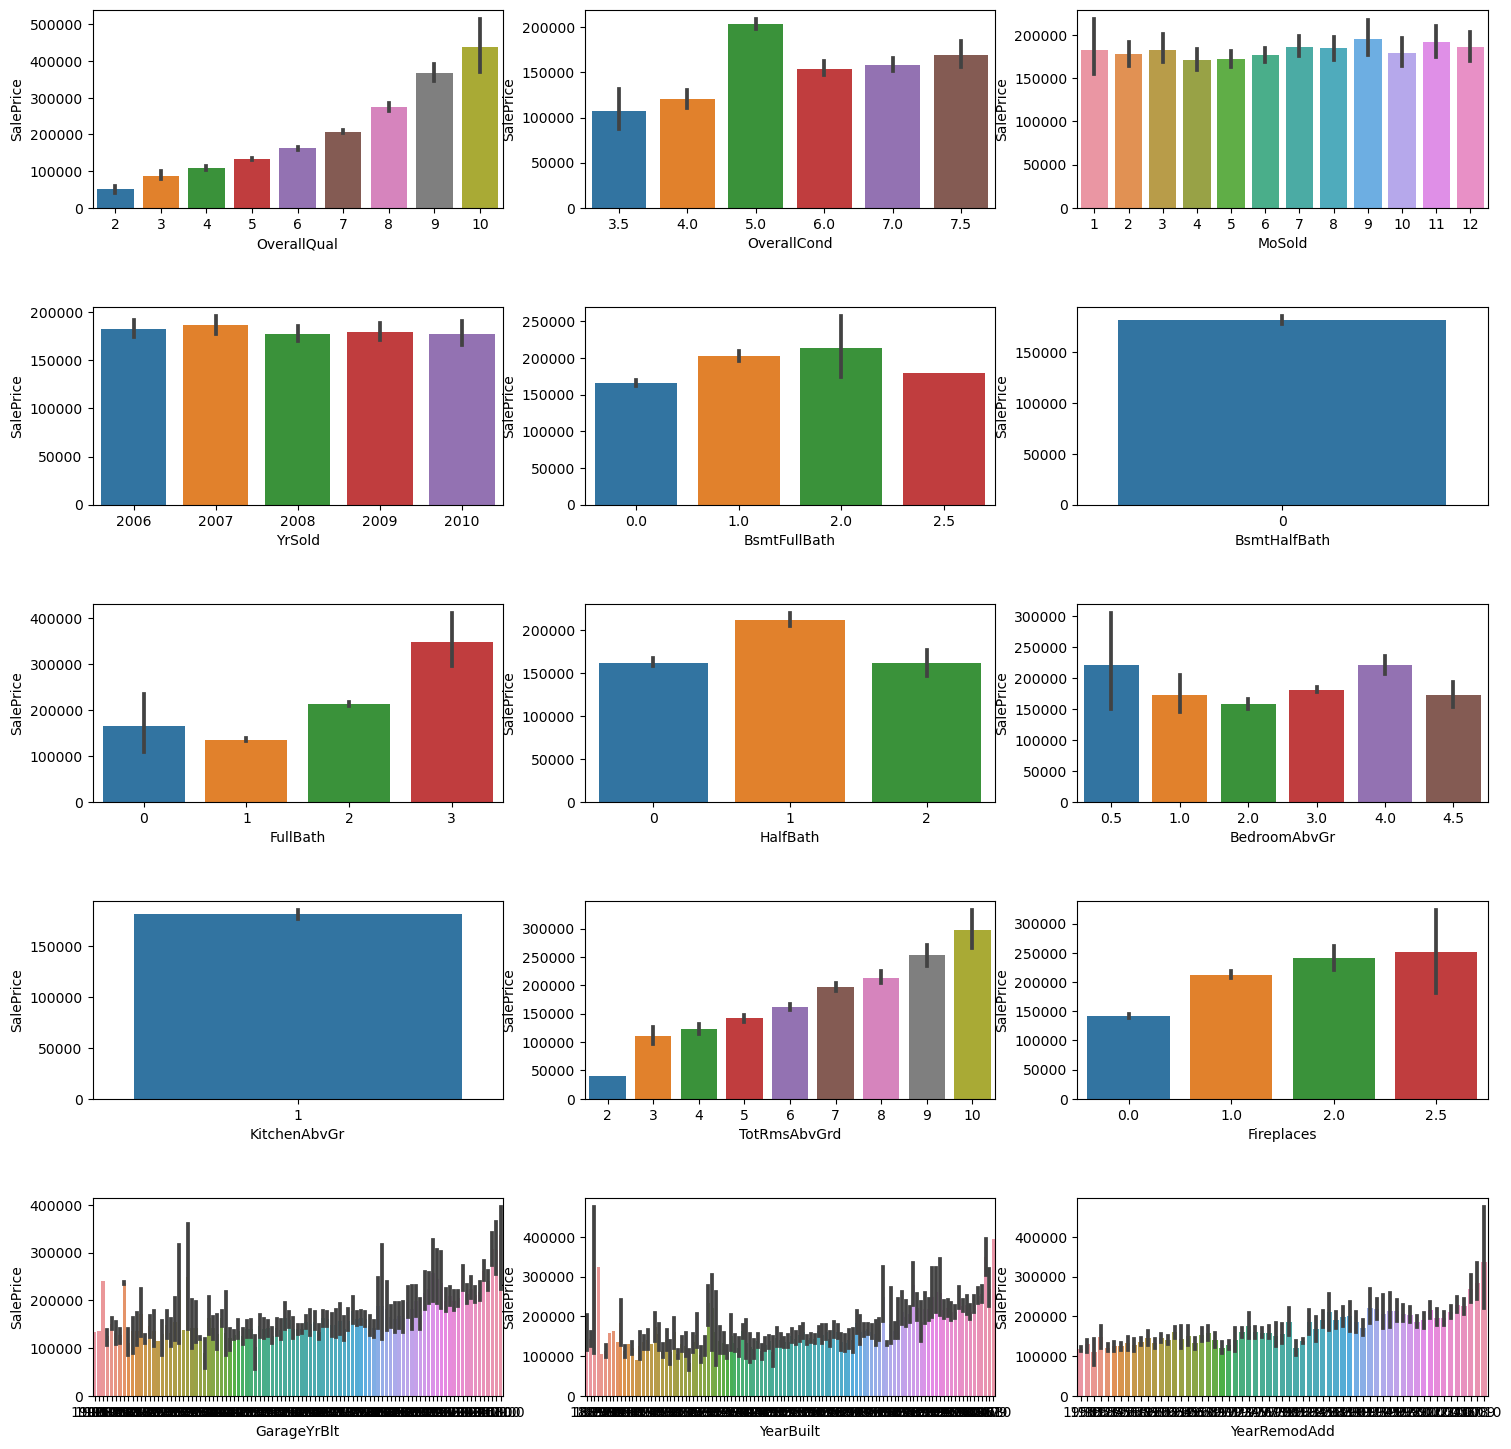

In [591]:
fig, axes = plt.subplots(5, 3, figsize=(18, 18))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    sns.barplot(x=raw_data[feature], y=raw_data['SalePrice'], ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

# Hide unused subplots
for j in range(len(axes)):
    if j >= len(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
        fig.delaxes(axes[j])

# Adjust layout
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Observations
1. OverallQual (Overall Quality): As the overall quality of a property increases, the sale price tends to increase. There's a clear positive correlation between the overall quality and the sale price.</br>
2. FullBath (Full Bathrooms) and HalfBath (Half Bathrooms): Similar to basement bathrooms, properties with more full and half bathrooms tend to have higher sale prices, suggesting that having more bathrooms in general is desirable.</br>
3. TotRmsAbvGrd (Total Rooms Above Ground): Properties with more rooms above ground tend to have higher sale prices, indicating that larger properties command higher prices.</br>
4. Fireplaces: Properties with fireplaces tend to have higher sale prices, suggesting that fireplaces add value to a property.</br>

In [592]:
raw_data[['BsmtFullBath', 'KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

BsmtFullBath  KitchenAbvGr  GarageYrBlt    YearBuilt  YearRemodAdd
count   1460.000000        1460.0  1379.000000  1460.000000   1460.000000
mean       0.425000           1.0  1978.506164  1971.299315   1984.865753
std        0.517373           0.0    24.689725    30.108397     20.645407
min        0.000000           1.0  1900.000000  1885.000000   1950.000000
25%        0.000000           1.0  1961.000000  1954.000000   1967.000000
50%        0.000000           1.0  1980.000000  1973.000000   1994.000000
75%        1.000000           1.0  2002.000000  2000.000000   2004.000000
max        2.500000           1.0  2010.000000  2010.000000   2010.000000

In [593]:
print(raw_data['BsmtFullBath'].value_counts())
print(raw_data['KitchenAbvGr'].value_counts())

BsmtFullBath
0.0    856
1.0    588
2.0     15
2.5      1
Name: count, dtype: int64
KitchenAbvGr
1    1460
Name: count, dtype: int64


In [594]:
# dropping KitchenAbvGr for not having useful information
raw_data.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [595]:
raw_data[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

GarageYrBlt    YearBuilt  YearRemodAdd       YrSold
count  1379.000000  1460.000000   1460.000000  1460.000000
mean   1978.506164  1971.299315   1984.865753  2007.815753
std      24.689725    30.108397     20.645407     1.328095
min    1900.000000  1885.000000   1950.000000  2006.000000
25%    1961.000000  1954.000000   1967.000000  2007.000000
50%    1980.000000  1973.000000   1994.000000  2008.000000
75%    2002.000000  2000.000000   2004.000000  2009.000000
max    2010.000000  2010.000000   2010.000000  2010.000000

In [596]:
# for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
#     minYear = raw_data[feature][raw_data[feature] > 0].min()
#     raw_data[feature] = raw_data[feature].apply(lambda x: minYear if x == 0 else x)

In [597]:
# Converting the year related features into number of years and replacing zeroes with min non zero year

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    raw_data[feature] = 2024 - raw_data[feature]

In [598]:
raw_data[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

GarageYrBlt    YearBuilt  YearRemodAdd       YrSold
count  1379.000000  1460.000000   1460.000000  1460.000000
mean     45.493836    52.700685     39.134247    16.184247
std      24.689725    30.108397     20.645407     1.328095
min      14.000000    14.000000     14.000000    14.000000
25%      22.000000    24.000000     20.000000    15.000000
50%      44.000000    51.000000     30.000000    16.000000
75%      63.000000    70.000000     57.000000    17.000000
max     124.000000   139.000000     74.000000    18.000000

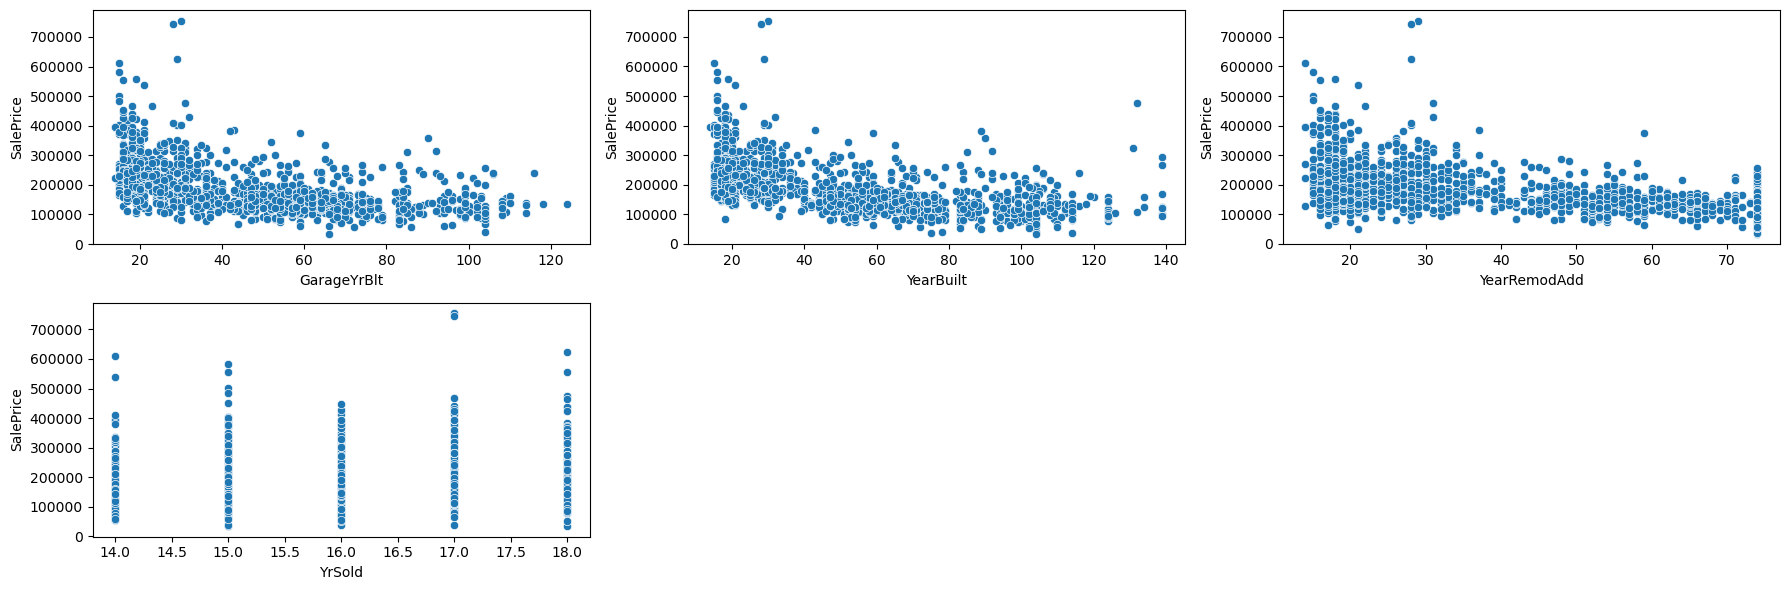

In [599]:
selected_features = ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']

# Calculate the number of subplots needed
num_features = len(selected_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3*num_rows))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.scatterplot(data=raw_data, x=feature, y='SalePrice', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

# Hide unused subplots
for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

**Comment:**
- For most the realty properties Garage is built within last 20 years, SalePrice is more in recently built garages
- SalePrice is more for lower value of YearBuilt i.e. more recently build houses
- Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice 
- YrSold still does not show any significant trend

#### Missing Value Handling - Numerical Features

In [600]:
print("Feature : Percentage of Missing Value")
for feat in raw_data.select_dtypes(exclude=['object']).columns:
    if raw_data[feat].isnull().any():
        print(feat, ' : ',  round(raw_data[feat].isnull().sum()/raw_data.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [601]:
# Since MasVnrArea has very lor percentage data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice

raw_data = raw_data[~raw_data['MasVnrArea'].isnull()]
raw_data.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

In [602]:
# Checking the number of remaining columns
raw_data.columns.shape

(73,)

#### Comment
GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars </br>
GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value</br>
TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea</br>
TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF</br>
Missing Value Imputation to be done for raw_data['LotFrontage'] after splitting data into train and test set to avoid data leakage.</br>

In [603]:
raw_data.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(raw_data.columns.shape)

(69,)


#### Analyzing Categorical Features

In [604]:
# Categorical features in the dataframe
non_numeric_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Missing Value Handling - Categorical Features

In [605]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in raw_data.select_dtypes(include=['object']).columns:
    if raw_data[feat].isnull().any():
        print(feat, ':', round(raw_data[feat].isnull().sum()/raw_data.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 94.0
MasVnrType : 60.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [606]:
raw_data['Electrical'].isnull().sum()

1

In [607]:
raw_data['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [608]:
# Comment:

# For 'Alley', Nan means 'No access to alley'
# For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
# For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
# For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
# MiscFeature - Nan means no additional features mentioned.
# All these features will be imputed with meaningful values in place of missing data.
# PoolQC has very high percentage of missing values. It will be dropped

In [609]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(raw_data[mv_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [610]:
# Imputing missing values with "Not_applicable"
raw_data[mv_categorical_features] = raw_data[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(raw_data[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [611]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
raw_data.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
raw_data.dropna(subset=['Electrical'], inplace=True)

In [612]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in raw_data.columns:
    if raw_data[feat].isnull().any():
        print(feat, ':', round(raw_data[feat].isnull().sum()/raw_data.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0
MasVnrType : 59.0


In [613]:
# Rest of missing value imputation will be done later
raw_data.columns.shape

(68,)

***Encoding For Categorical Variables Ordered Features*** -- to be label encoded 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

***Unordered Features*** -- to be one hot encoded 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [614]:
# Function to generate bar plot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    num_features = len(feature_list)
    num_cols = 2
    num_rows = (num_features + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 6))
    
    # Flatten the axes array to easily access each subplot
    axes = axes.flatten()

    for i, feature in enumerate(feature_list):
        sns.boxplot(x=raw_data['SalePrice'], y=raw_data[feature], ax=axes[i])
        axes[i].set_xlabel('SalePrice')
        axes[i].set_ylabel(feature)

    # Hide unused subplots
    for j in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()

Dividing the ordinal features into smaller segments and visualizing their impact on SalePrice.

Analyzing Ordered Features

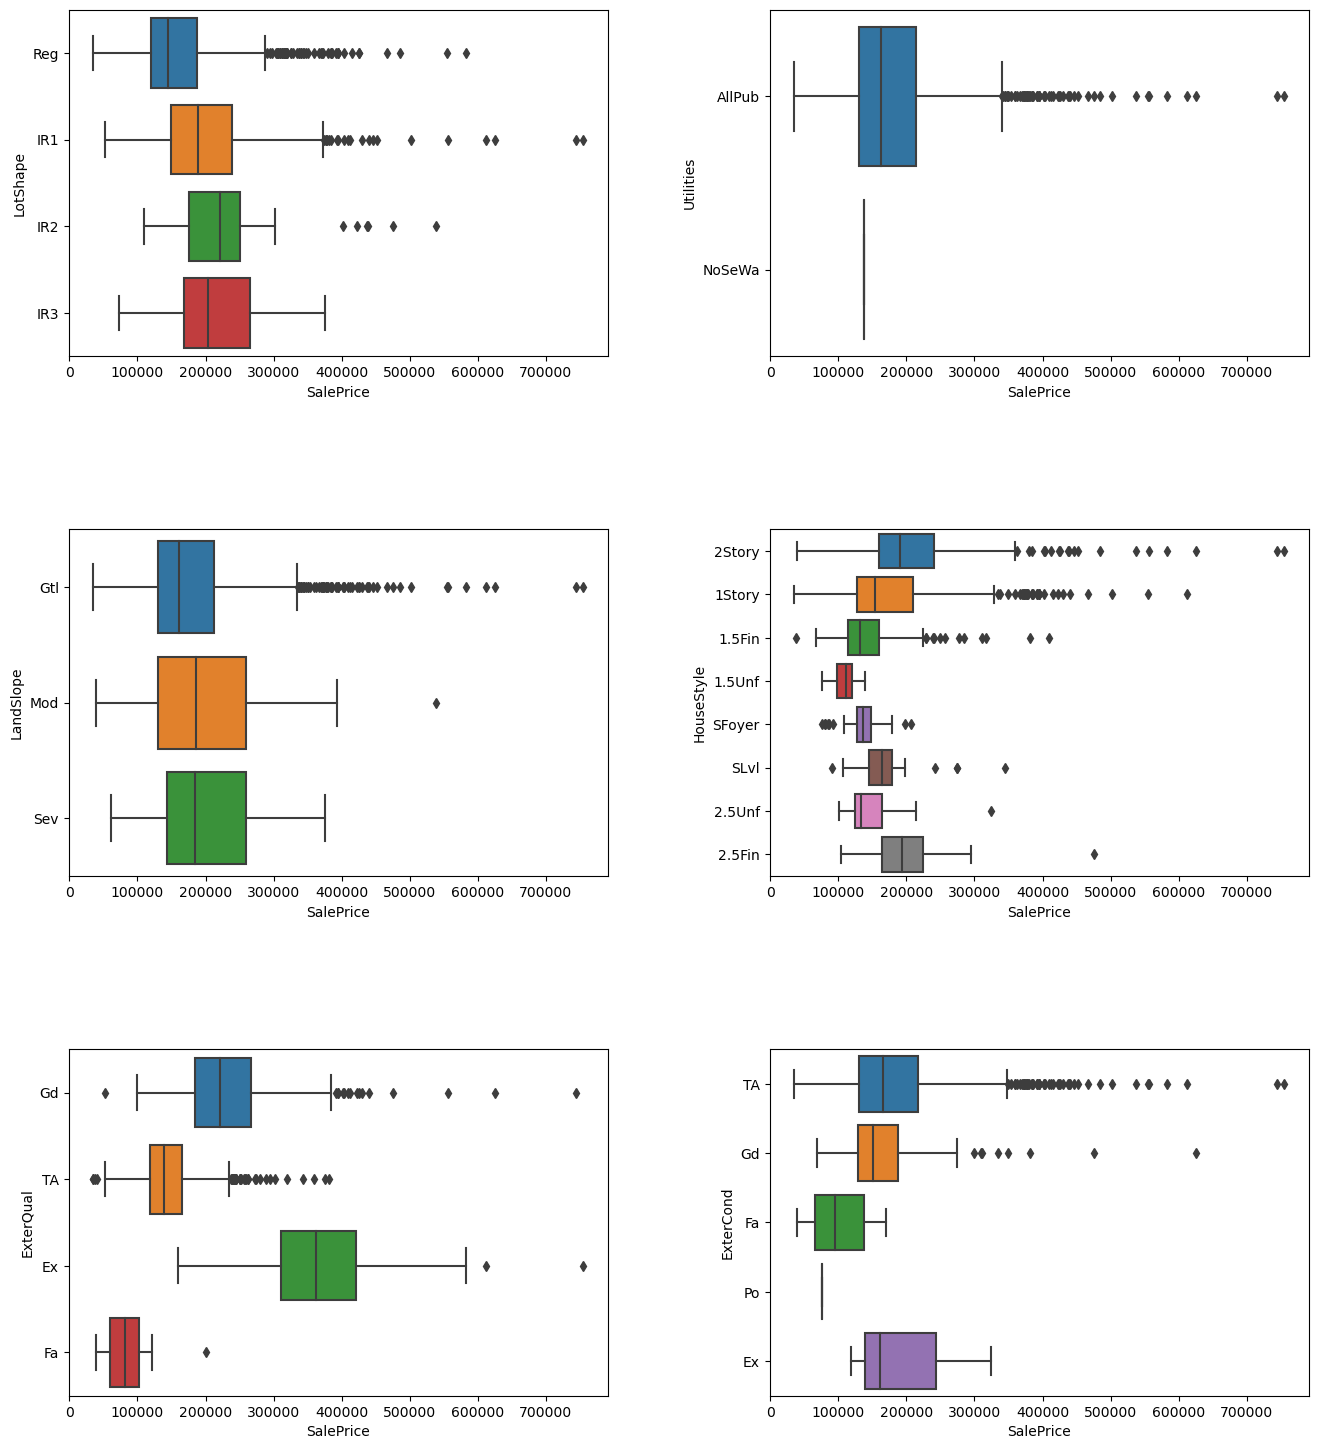

In [615]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

generate_boxplot(ext_features)

#### Observations
'LotShape' : Slightly irregular LotShape have the highest SalePrice</br>
'Utilities' : Most of the houses in the dataset have all the public utilities</br>
'LandSlope' : Houses at severe land slope have lowest SalePrice</br>
'HouseStyle' : 2 storied houses have the highest SalePrice</br>
'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice</br>


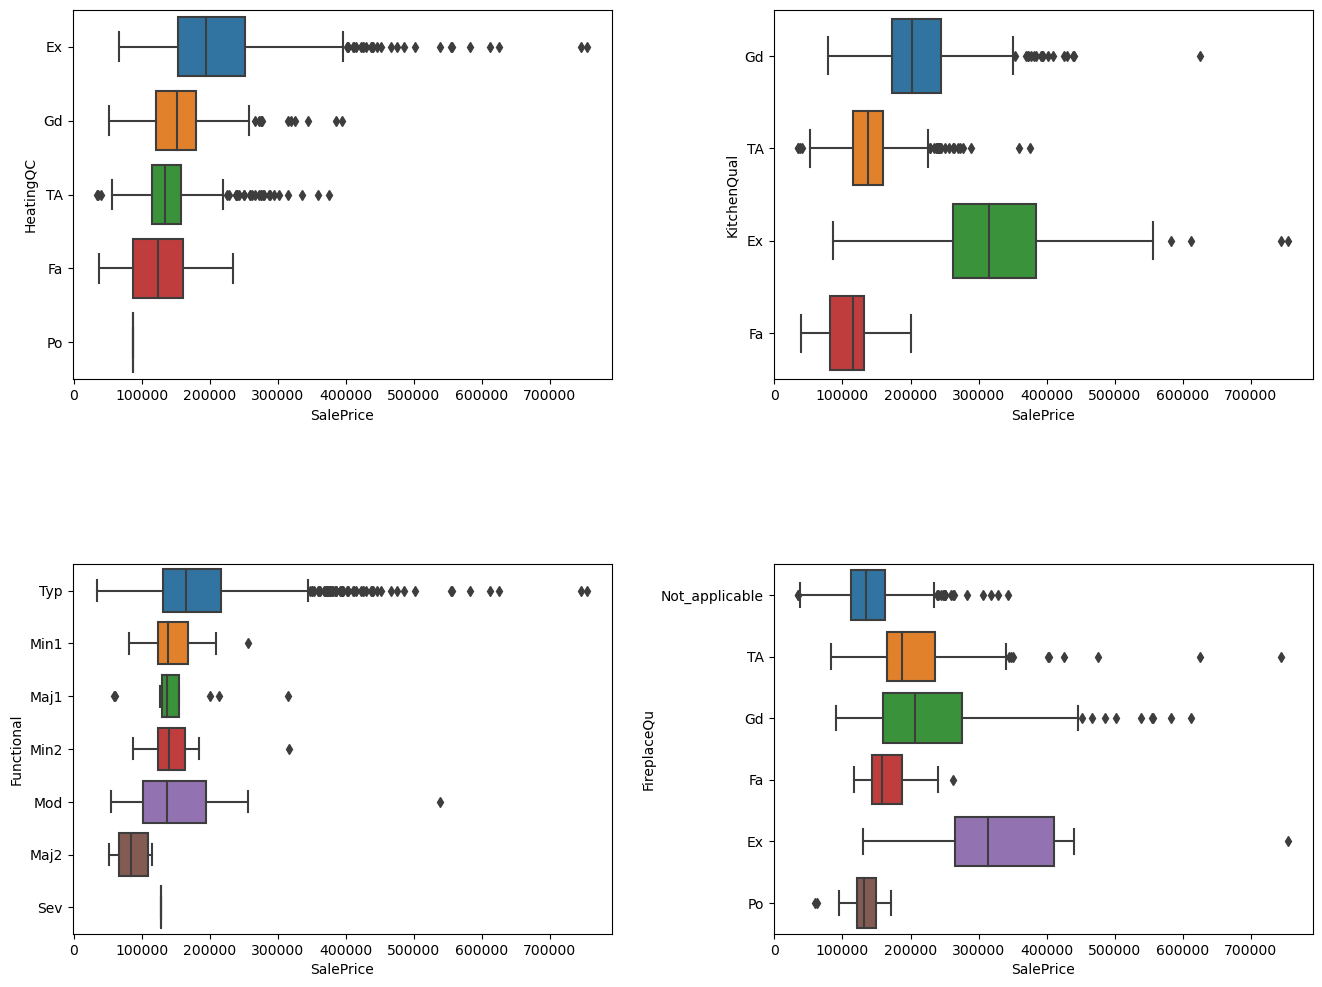

In [616]:
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(int_features)

#### Observations
Excellent Heating Quality and Kitchen quality fetch best prices</br>
Houses with Typical Functionality and Excellent Fireplace Quality Fetch best prices</br>

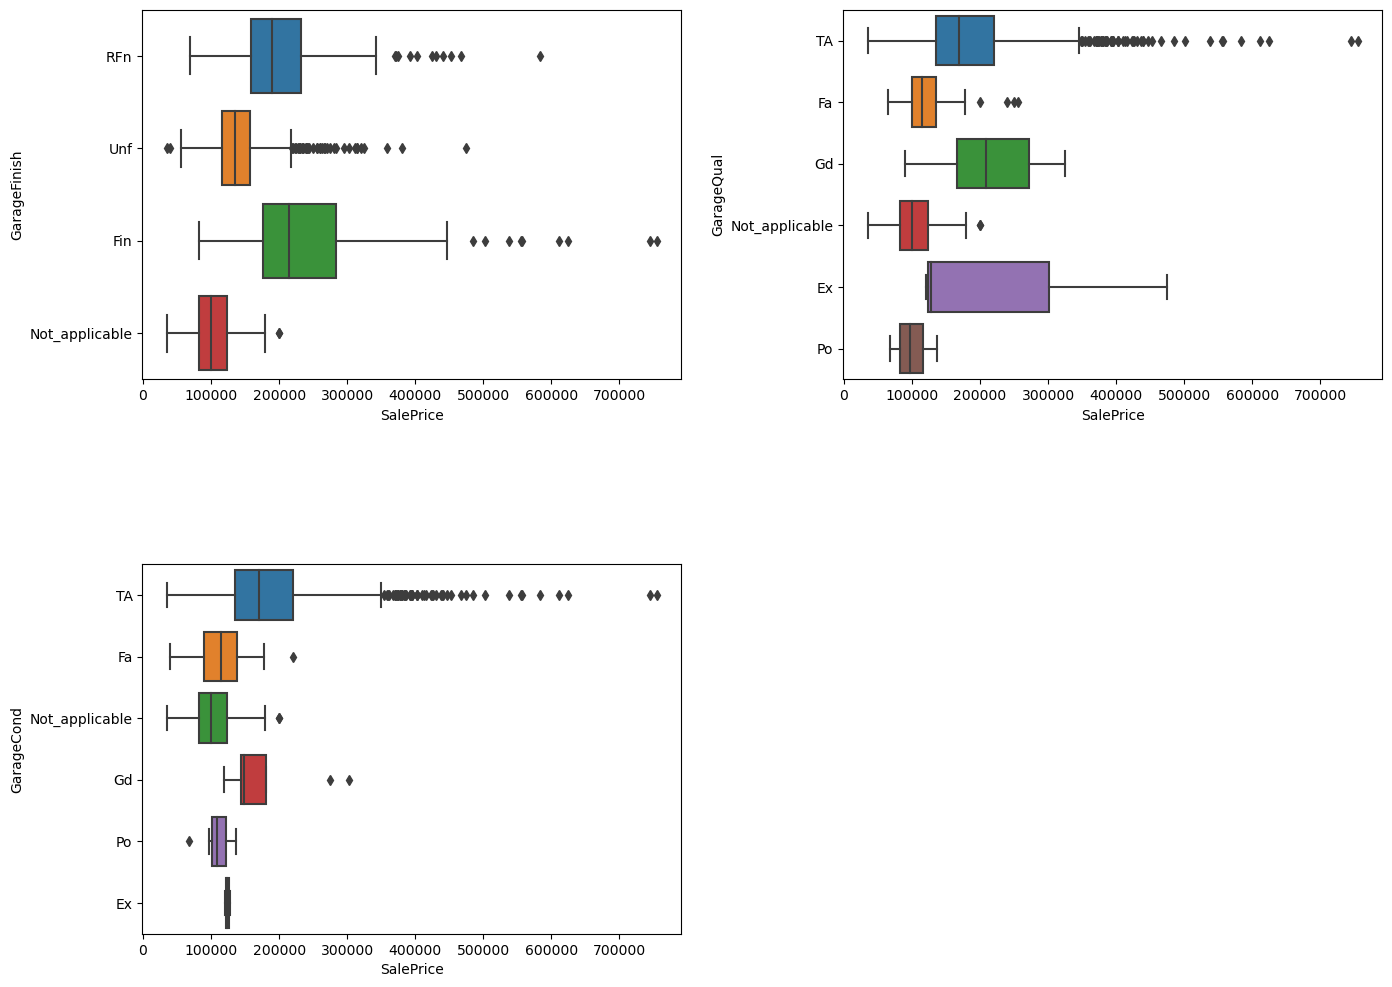

In [617]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond']

generate_boxplot(garage_features)

#### Observations
Finished Garage getch higheest prices</br>
Good Quality Garages have highest prices</br>
mostly houses come with typical garage quality</br>

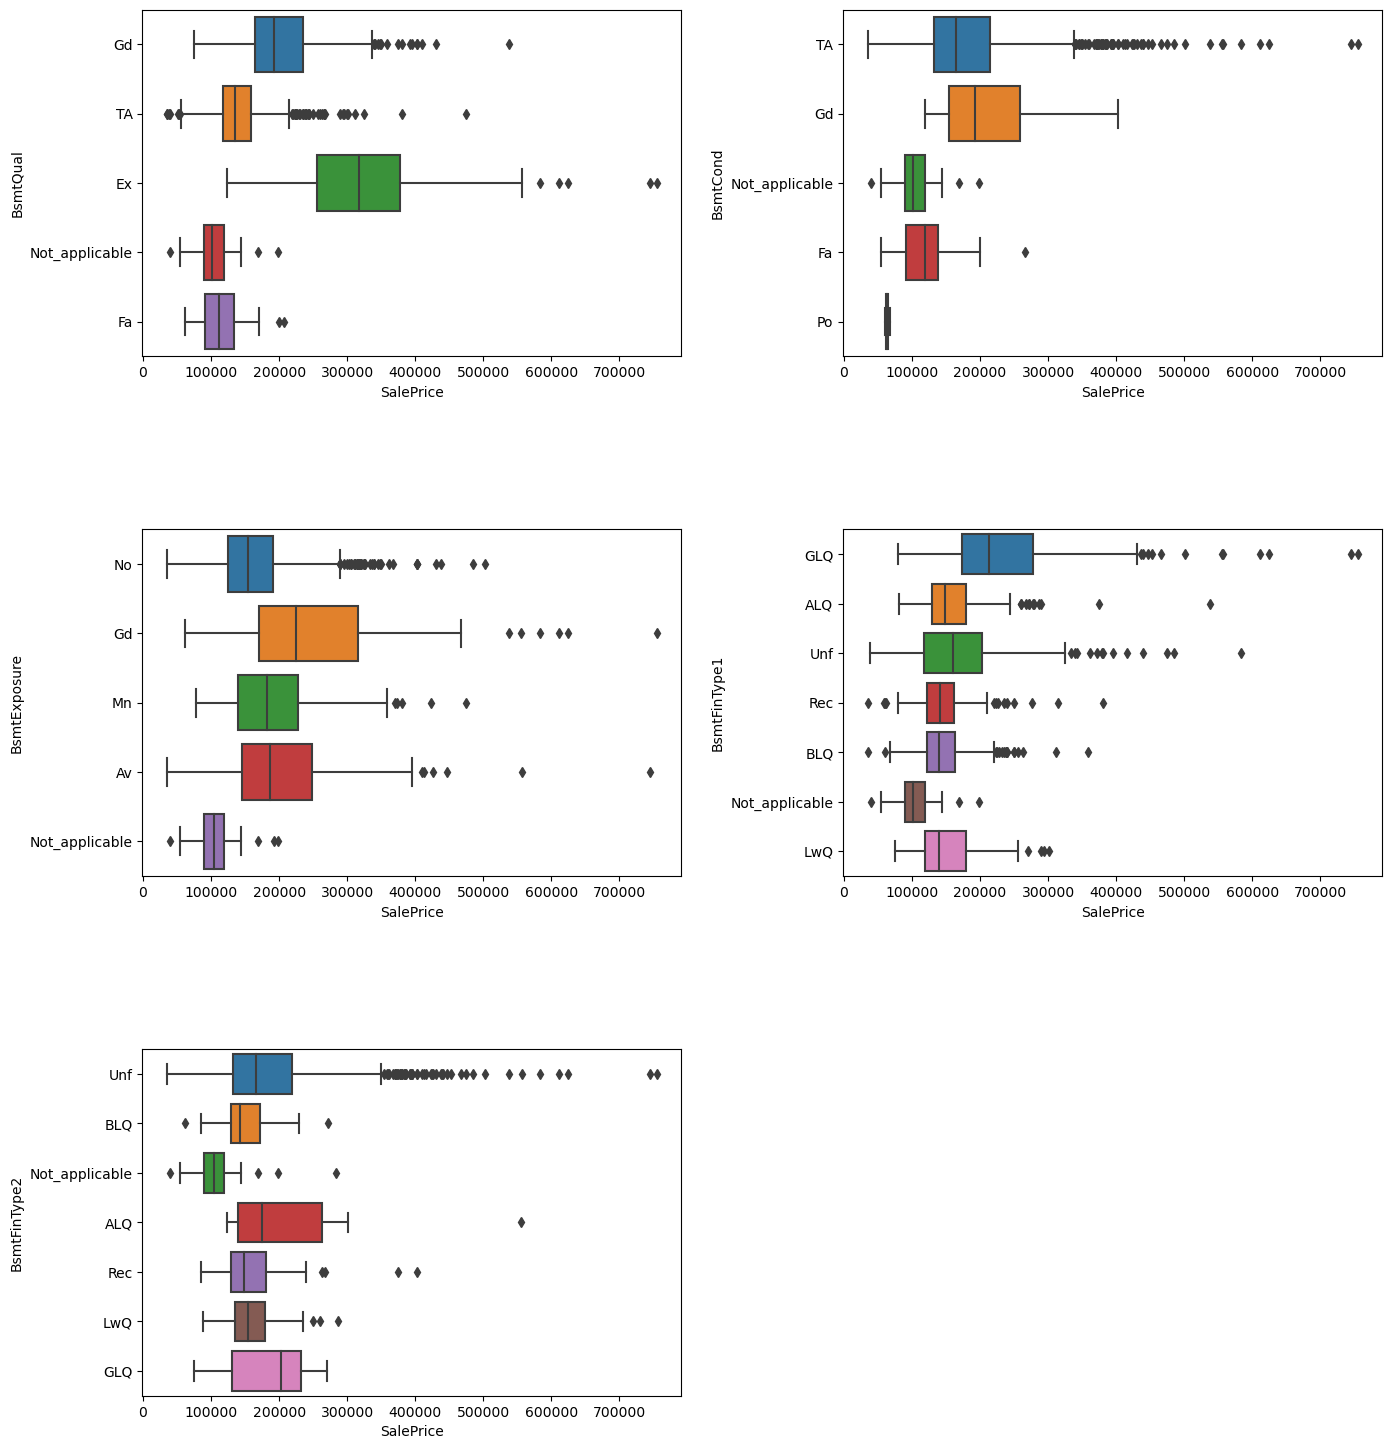

In [618]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(basement_features)

#### Observations
Basement quality and basement condition are positively related to prices</br>
Basement Fin type1 GLQ and Good Basement Exposure fetch best prices</br>
Mostly Basement Type 2 are unfinished</br>


#### Encoding Categorical Features

In [619]:
raw_data['LotShape'] = raw_data['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
raw_data['Utilities'] = raw_data['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
raw_data['LandSlope'] = raw_data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
raw_data['HouseStyle'] = raw_data['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
raw_data['ExterQual'] = raw_data['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
raw_data['ExterCond'] = raw_data['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
raw_data['BsmtQual'] = raw_data['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
raw_data['BsmtCond'] = raw_data['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
raw_data['BsmtExposure'] = raw_data['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
raw_data['BsmtFinType1'] = raw_data['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
raw_data['BsmtFinType2'] = raw_data['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
raw_data['HeatingQC'] = raw_data['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
raw_data['CentralAir'] = raw_data['CentralAir'].map({'N':0,'Y':1})
raw_data['KitchenQual'] = raw_data['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
raw_data['GarageFinish'] = raw_data['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
raw_data['GarageQual'] = raw_data['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
raw_data['GarageCond'] = raw_data['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
raw_data['Functional'] = raw_data['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
raw_data['FireplaceQu'] = raw_data['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [620]:
# Checking the features after encoding

raw_data[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 215.4 KB


#### Analyzing Unordered Featues

In [621]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

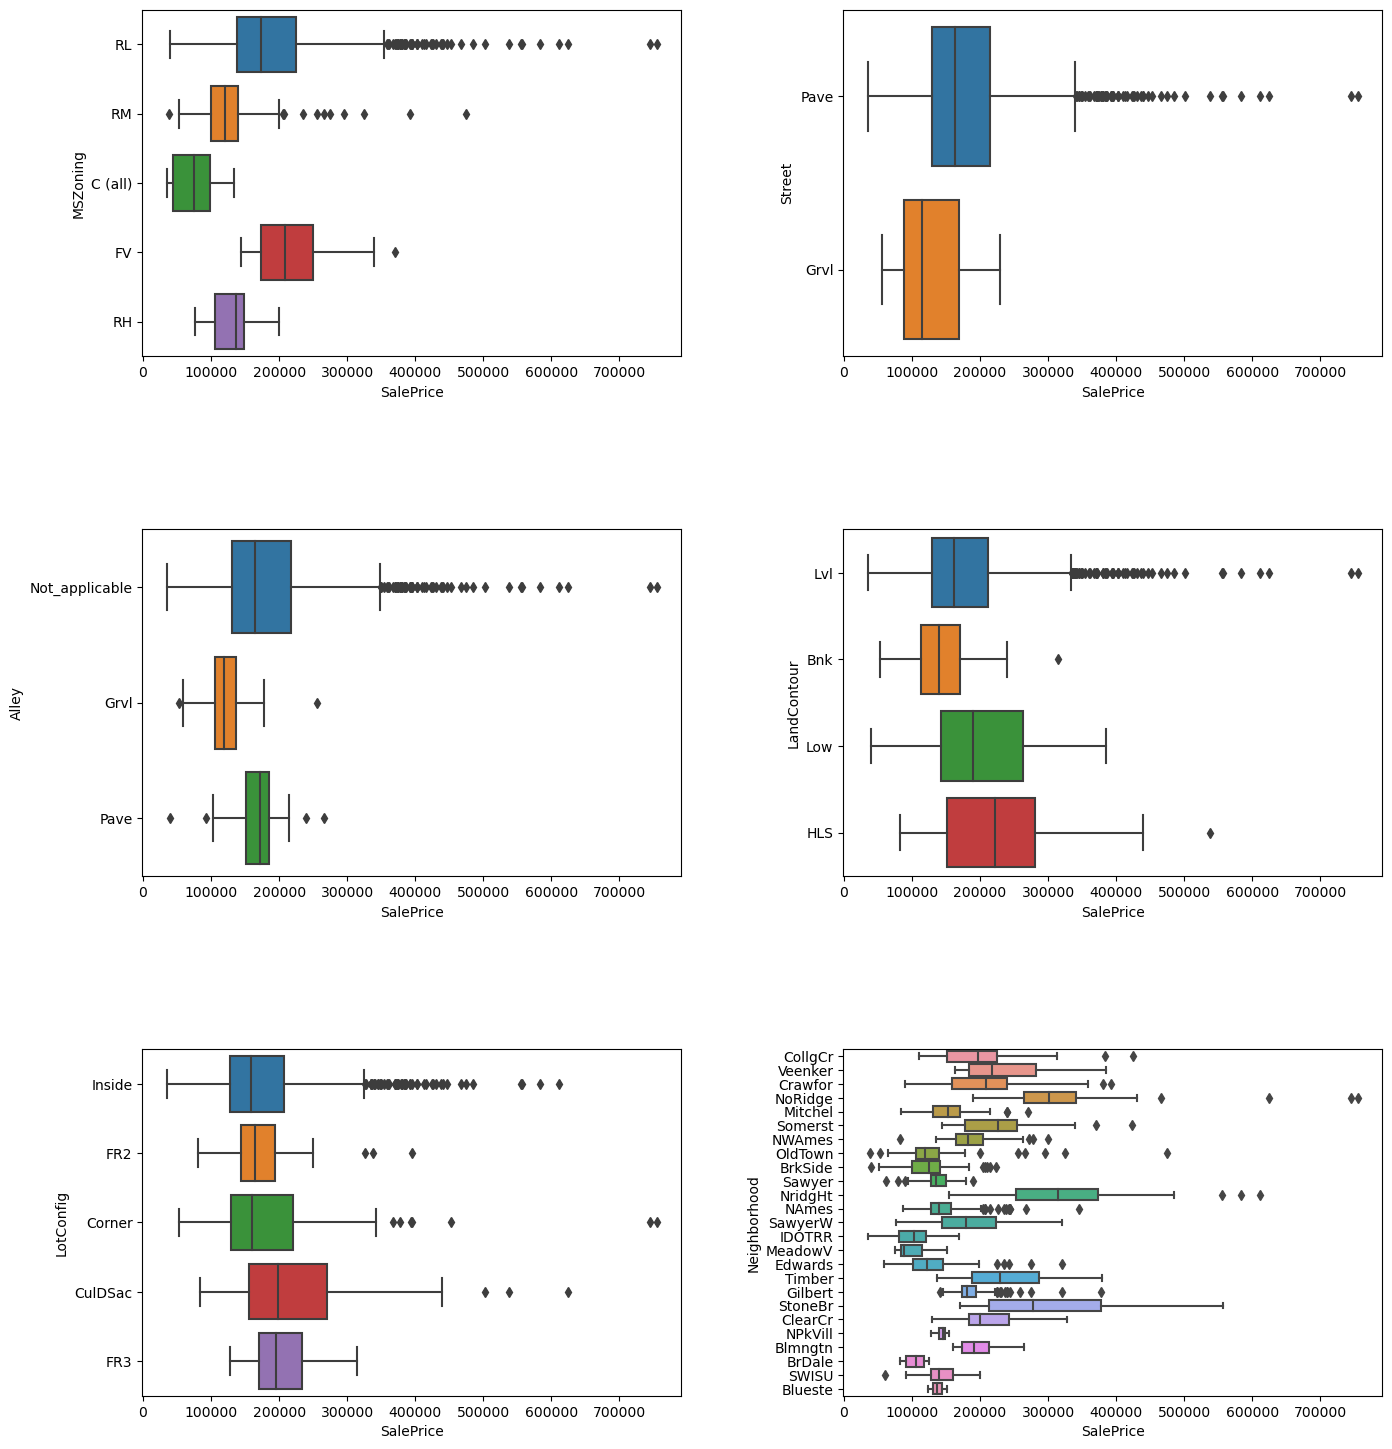

In [622]:
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

#### Observations
Most of the houses do not have alley</br>
Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns</br>
Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice</br>

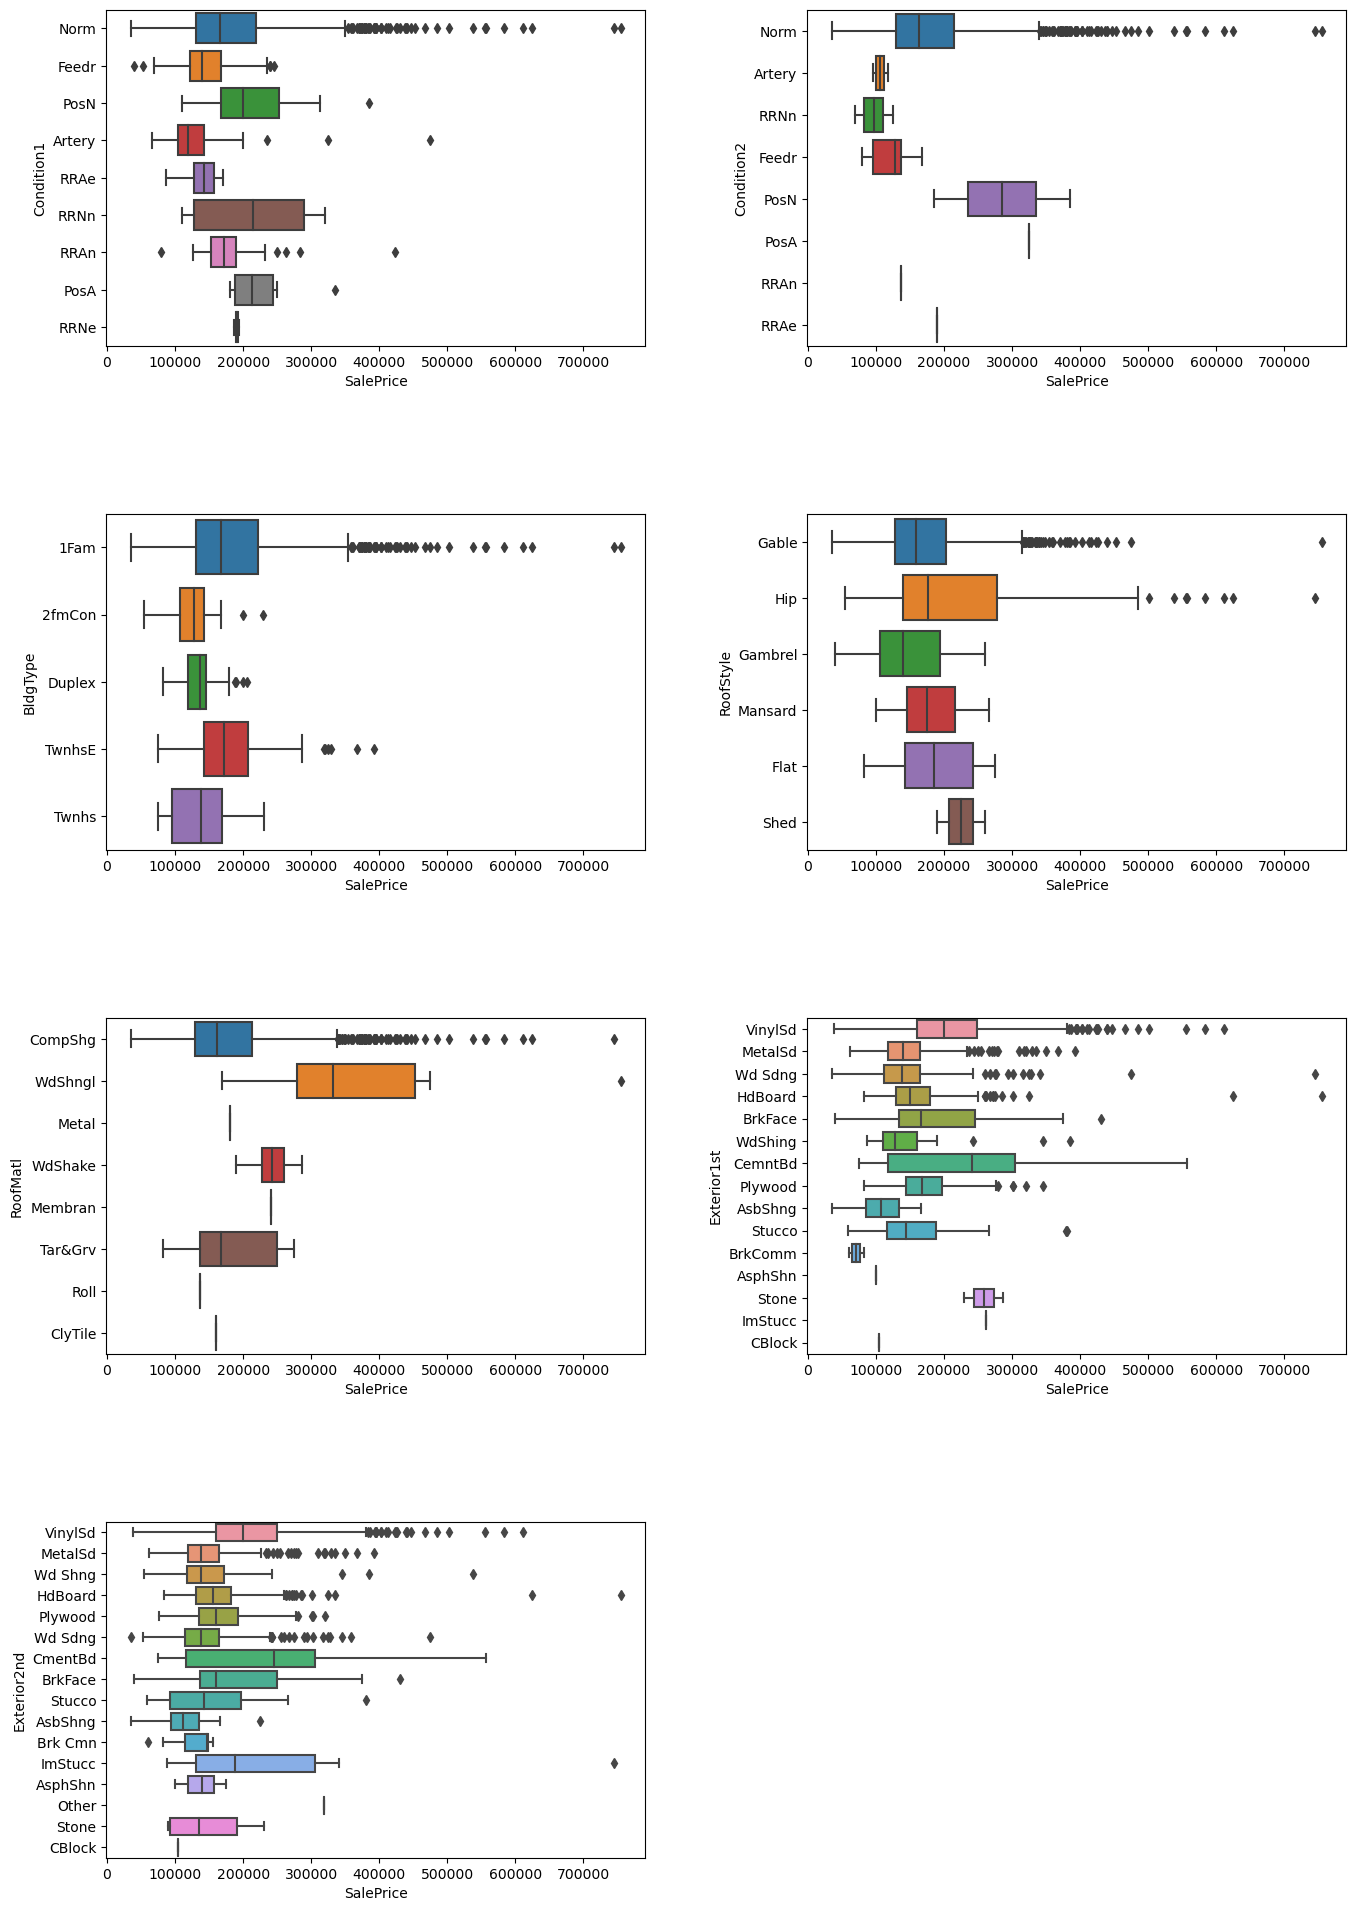

In [623]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

**Comment:**
- Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
- Features like 'RoofMatl', 'Cond2' have some labels with very few data, this labels cannot contribute in predicting SalePricee.

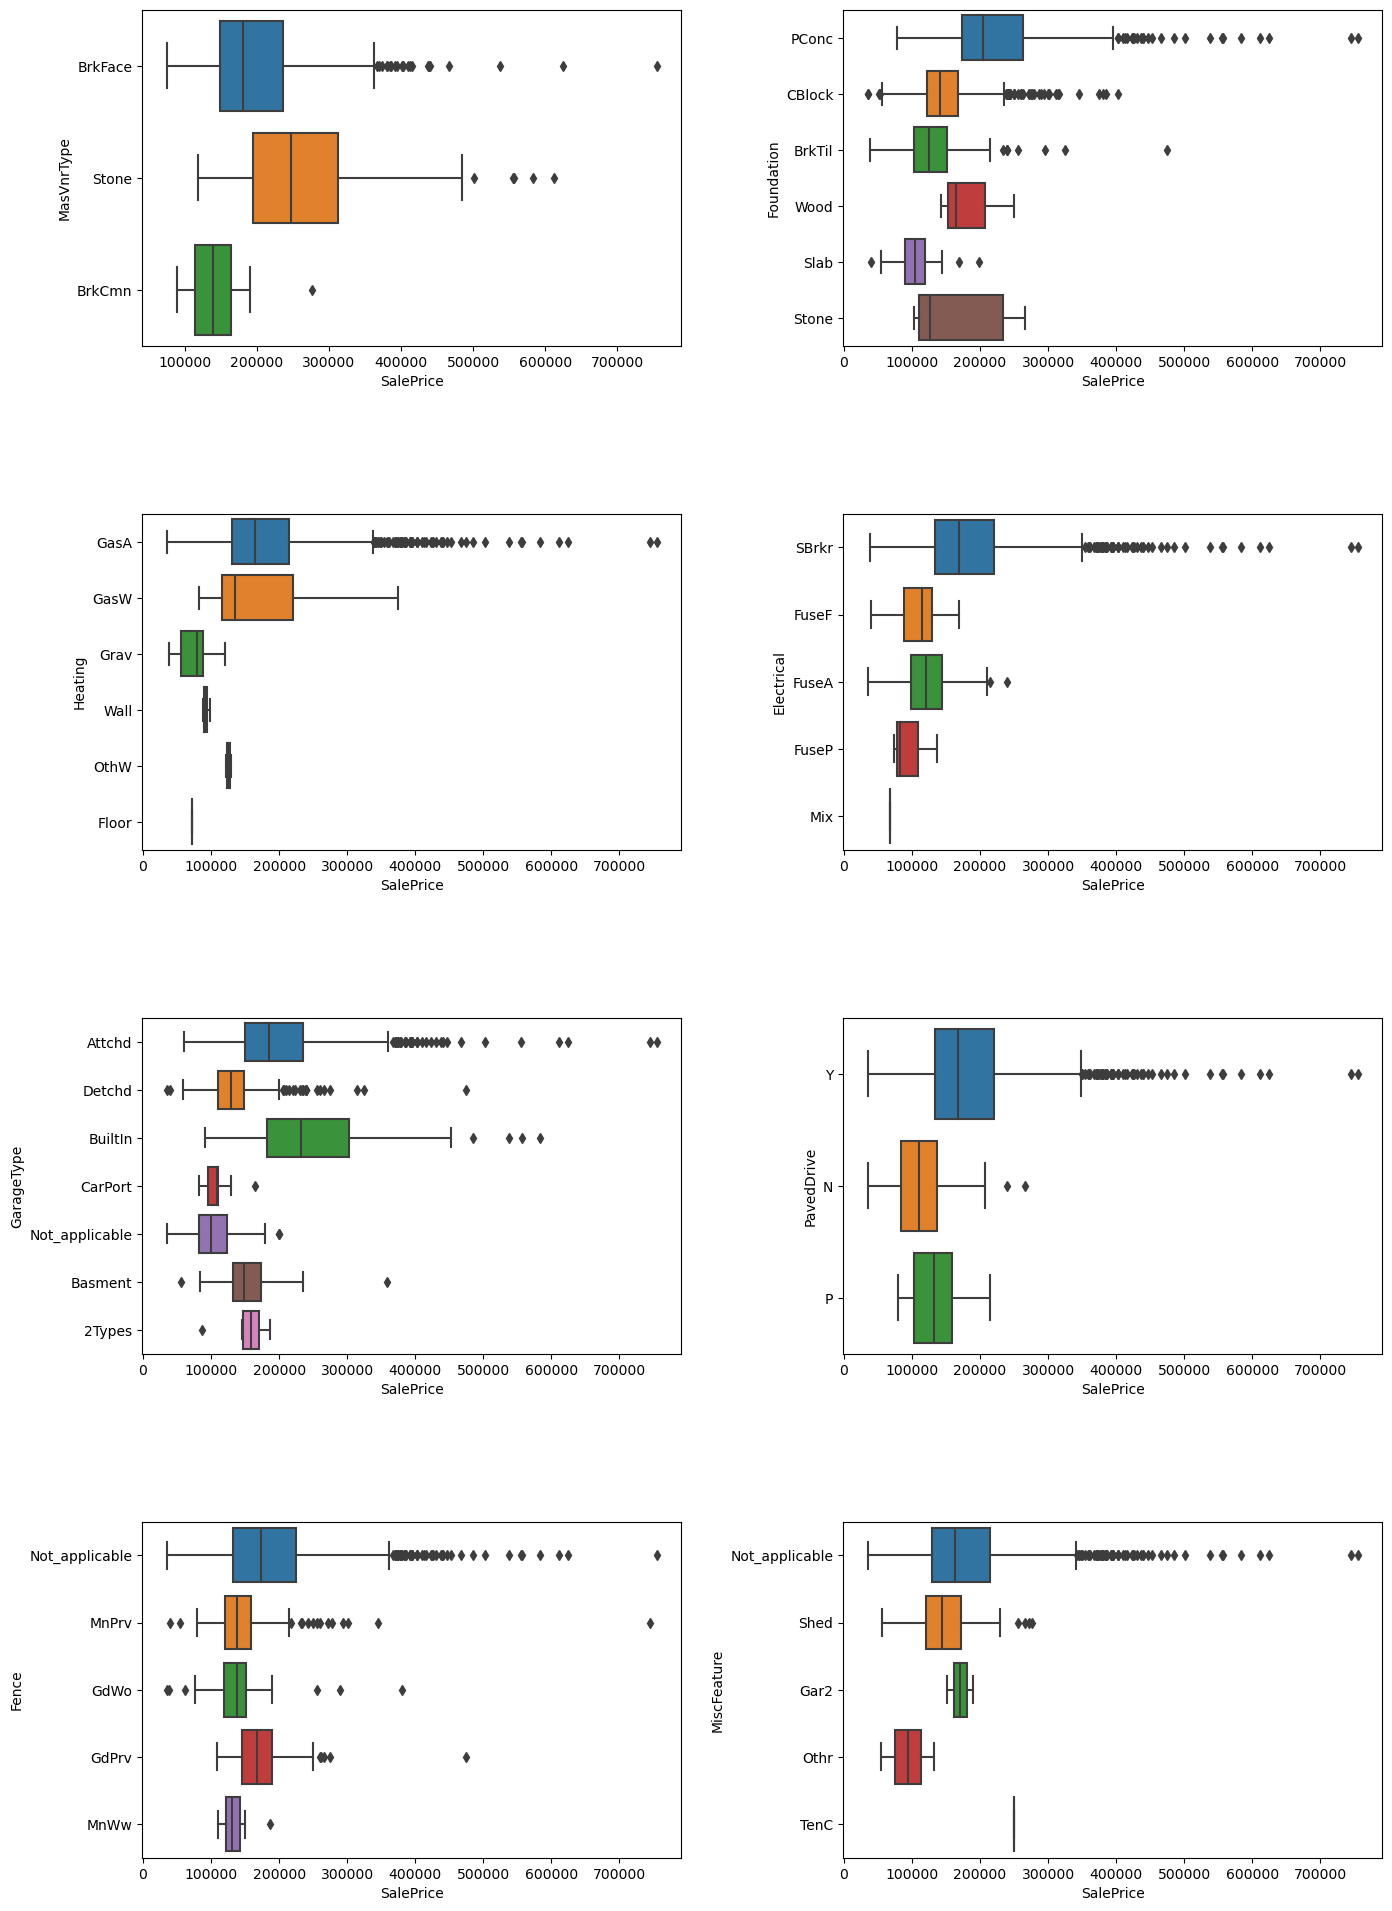

In [624]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

**Comment:**

- Houses with foundation of poured concrete (Foundation = PConc) have highest price
- Electrical with Standard Circuit Breaker have highest price
- Heating type = GasA have the highest price
- Houses with attached and built-in garage have high SalePrice
- Most of the houses do not have fence (Fence= Not_applicable)

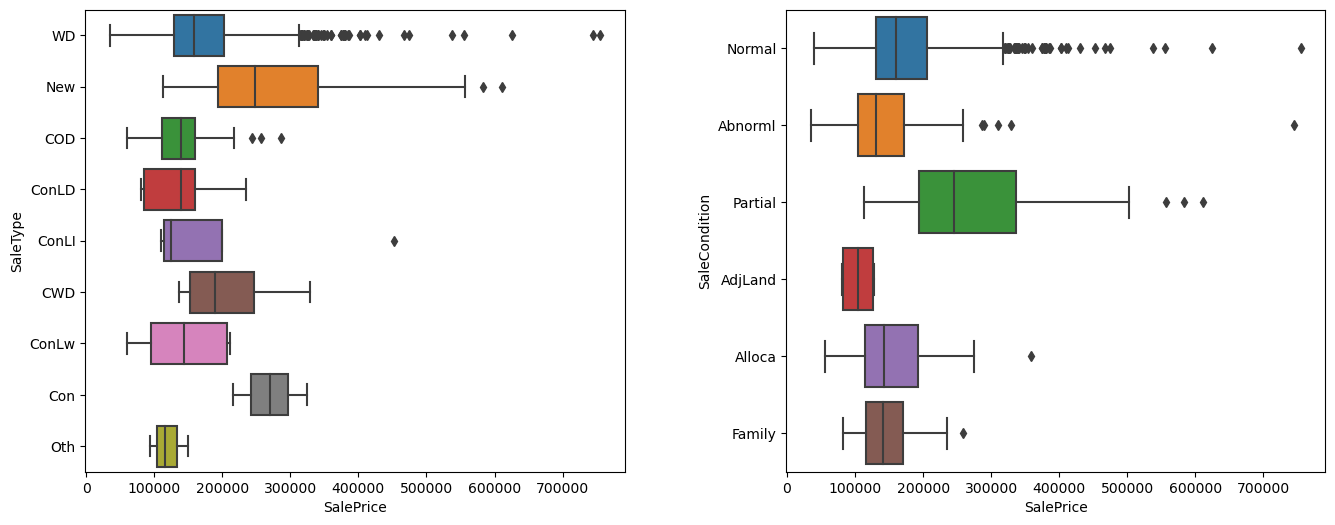

In [625]:
generate_boxplot(['SaleType','SaleCondition'])

**Comment:**

- Most of the houses are newly built, houses with warranty deed have high SalePrice
- Sale condition = Partial leads to high SalePrice

#### Encoding Categorical Variables

In [626]:
dummy_df = pd.get_dummies(raw_data[unordered_features], drop_first=True)

In [627]:
dummy_df.shape

(1451, 143)

**Comment:**

- Adding 144 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [628]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Street_Pave', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_A

In [629]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 46)


In [630]:
raw_data.shape

(1451, 68)

In [631]:
# Adding the dummy variables to the original dataframe
raw_data = pd.concat([raw_data,dummy_df],axis=1)

# Dropping the redundant columns
raw_data = raw_data.drop(unordered_features,axis=1)

In [632]:
raw_data.shape

(1451, 91)

### Splitting into Train and Test Data

In [633]:
X = raw_data.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0          60         65.0   8450.0         3          3          0   
1          20         80.0   9600.0         3          3          0   
2          60         68.0  11250.0         0          3          0   
3          70         60.0   9550.0         0          3          0   
4          60         84.0  14260.0         0          3          0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_BuiltIn  \
0           3            7          5.0         21  ...               False   
1           0            6          7.5         48  ...               False   
2           3            7          5.0         23  ...               False   
3           3            7          5.0        109  ...               False   
4           3            8          5.0         24  ...               False   

   GarageType_Detchd  GarageType_Not_applicable  PavedDrive_Y  Fence_MnPrv  \
0              False                      False          True        False   
1              False                      False          True        False   
2              False                      False          True        False   
3               True                      False          True        False   
4              False                      False          True        False   

   Fence_Not_applicable  SaleType_New  SaleType_WD  SaleCondition_Normal  \
0                  True         False         True                  True   
1                  True         False         True                  True   
2                  True         False         True                  True   
3                  True         False         True                 False   
4                  True         False         True                  True   

   SaleCondition_Partial  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 90 columns]

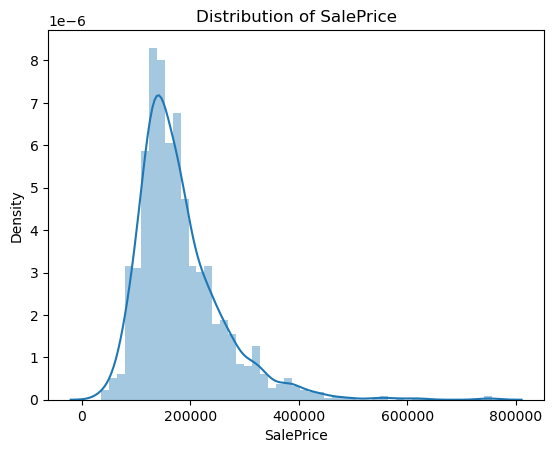

In [634]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(raw_data['SalePrice'])
plt.show()

**Comment:** 
Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice. 

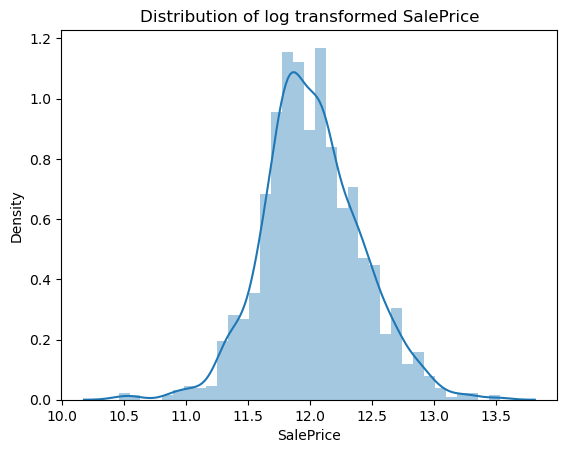

In [635]:
sns.distplot(np.log(raw_data['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [636]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(raw_data['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [637]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [638]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 90)
(291, 90)
(1160,)
(291,)


In [639]:
X['LotFrontage'].isnull().any()

True

In [640]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [641]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [642]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

### Feature Scaling


In [643]:
X_train.values

array([[50, 54.0, 6342.0, ..., True, True, False],
       [145, 27.5, 2522.0, ..., True, True, False],
       [20, 70.0, 7931.0, ..., True, True, False],
       ...,
       [50, 50.0, 9000.0, ..., True, True, False],
       [20, 48.0, 10635.0, ..., True, True, False],
       [20, 67.0, 10656.0, ..., False, False, True]], dtype=object)

In [644]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [645]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [646]:
# Checking the features after 

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.137941    -0.840191 -0.892882  0.747271   0.029374  -0.225421   
1       2.389253    -2.335542 -1.956426  0.747271   0.029374  -0.225421   
2      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
3      -0.936002     0.000000 -0.396469 -1.386037   0.029374  -0.225421   
4      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
5      -0.137941     0.000000 -0.921280  0.747271   0.029374  -0.225421   
6      -0.936002    -0.558050  0.290659 -1.386037   0.029374  -0.225421   
7      -0.936002    -0.501621  0.014193  0.747271   0.029374  -0.225421   
8      -0.936002     0.000000  2.261973 -0.674935   0.029374  -0.225421   
9      -0.936002     0.344804  1.394851  0.747271   0.029374  -0.225421   
10     -0.936002    -1.065905 -0.040098  0.747271   0.029374  -0.225421   
11      0.128080     0.006234 -0.545420  0.747271   0.029374  -0.225421   
12      0.527110    -0.50

### Initial Feature Selection with RFE

In [647]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n_features_to_select=n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [648]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'BldgType_TwnhsE', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'Hea

In [649]:
print(len(top_45))
print(len(top_50))
print(len(top_55))

45
50
55


In [650]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())

In [651]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     266.9
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:09:01   Log-Likelihood:                 872.12
No. Observations:                1160   AIC:                            -1652.
Df Residuals:                    1114   BIC:                            -1420.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [652]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     250.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:09:01   Log-Likelihood:                 874.57
No. Observations:                1160   AIC:                            -1651.
Df Residuals:                    1111   BIC:                            -1403.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [653]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     227.8
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:09:01   Log-Likelihood:                 878.66
No. Observations:                1160   AIC:                            -1649.
Df Residuals:                    1106   BIC:                            -1376.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Comment:** By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [654]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [655]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

#### Ridge Regression

In [656]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 10.000000
ridge  Regression with  10.0
R2 score (train) :  0.9153901412030043
R2 score (test) :  0.877402231653771
RMSE (train) :  0.11391245322381835
RMSE (test) :  0.14969717488308848


#### Observations
- Ridge model with an alpha value of 10, got R2 score of .87 on test data whereas RMSE is .14

#### Lasso Regression

In [657]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9147430403546245
R2 score (test) :  0.8778463903796656
RMSE (train) :  0.11434722786232822
RMSE (test) :  0.1494257603311488


#### Observations
- Lasso regularisation alpha comes to be .001. Its R2 score is 0.87 on test data which means that model is able to explain 87% variance in test data
- RMSE is 0.1494 which means that prediction made by model can produce an error of 0.1494

### Comparing Model Coefficients

In [658]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=10)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=10)  Lasso (alpha=0.001)
MSSubClass                        -0.005967            -0.002909
LotFrontage                        0.007141             0.004967
LotArea                            0.031681             0.031127
LandSlope                          0.009798             0.009176
OverallQual                        0.077656             0.079956
OverallCond                        0.048499             0.048929
YearBuilt                         -0.036546            -0.038311
ExterQual                          0.009467             0.009804
BsmtQual                           0.021282             0.022386
BsmtExposure                       0.010514             0.008875
BsmtFinSF1                         0.027786             0.028040
BsmtFinSF2                         0.000000             0.000000
HeatingQC                          0.013214             0.013330
CentralAir                         0.008973             0.008419
1stFlrSF                           0.122702             0.125272
2ndFlrSF                           0.104458             0.104353
BsmtFullBath                       0.018521             0.016834
BsmtHalfBath                       0.000000             0.000000
FullBath                           0.008317             0.005285
HalfBath                           0.010490             0.008451
KitchenQual                        0.011887             0.011834
Functional                        -0.025503            -0.024486
Fireplaces                         0.022361             0.022077
GarageFinish                       0.009460             0.008901
GarageArea                         0.019229             0.019680
GarageQual                         0.015219             0.006691
WoodDeckSF                         0.006184             0.005459
OpenPorchSF                        0.008007             0.007368
MSZoning_RL                        0.034630             0.027142
MSZoning_RM                        0.006863             0.000000
LotConfig_CulDSac                  0.009719             0.008342
Neighborhood_Edwards              -0.013961            -0.012373
Neighborhood_NAmes                -0.006453            -0.004578
Neighborhood_NridgHt               0.015779             0.014145
Neighborhood_Somerst               0.026324             0.022372
Condition1_Feedr                   0.012748             0.010465
Condition1_Norm                    0.028374             0.025485
BldgType_TwnhsE                    0.006848             0.003233
Exterior1st_HdBoard               -0.018262            -0.009769
Exterior1st_Plywood               -0.006919            -0.005130
Exterior1st_Wd Sdng               -0.018573            -0.010820
Exterior2nd_HdBoard                0.007279             0.000000
Exterior2nd_Wd Sdng                0.011423             0.003752
Foundation_PConc                   0.017261             0.017923
GarageType_Attchd                  0.015385             0.009981
GarageType_Detchd                  0.019146             0.011840
GarageType_Not_applicable          0.011802            -0.000000
PavedDrive_Y                       0.008074             0.007057
SaleCondition_Normal               0.028907             0.028494
SaleCondition_Partial              0.034359             0.033863

In [659]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[293905 226049 133279 116077 148169]


### Final Model

Both methods produced almost similar results. Choosing lasso since its R2 on test data is slightly better.

In [661]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

Lasso (alpha=0.001)
1stFlrSF                              0.125272
2ndFlrSF                              0.104353
OverallQual                           0.079956
OverallCond                           0.048929
SaleCondition_Partial                 0.033863
LotArea                               0.031127
SaleCondition_Normal                  0.028494
BsmtFinSF1                            0.028040
MSZoning_RL                           0.027142
Condition1_Norm                       0.025485
BsmtQual                              0.022386
Neighborhood_Somerst                  0.022372
Fireplaces                            0.022077
GarageArea                            0.019680
Foundation_PConc                      0.017923
BsmtFullBath                          0.016834
Neighborhood_NridgHt                  0.014145
HeatingQC                             0.013330
GarageType_Detchd                     0.011840
KitchenQual                           0.011834
Condition1_Feedr                      0.010465
GarageType_Attchd                     0.009981
ExterQual                             0.009804
LandSlope                             0.009176
GarageFinish                          0.008901
BsmtExposure                          0.008875
HalfBath                              0.008451
CentralAir                            0.008419
LotConfig_CulDSac                     0.008342
OpenPorchSF                           0.007368
PavedDrive_Y                          0.007057
GarageQual                            0.006691
WoodDeckSF                            0.005459
FullBath                              0.005285
LotFrontage                           0.004967
Exterior2nd_Wd Sdng                   0.003752
BldgType_TwnhsE                       0.003233
Exterior2nd_HdBoard                   0.000000
MSZoning_RM                           0.000000
BsmtFinSF2                            0.000000
GarageType_Not_applicable            -0.000000
BsmtHalfBath                          0.000000
MSSubClass                           -0.002909
Neighborhood_NAmes                   -0.004578
Exterior1st_Plywood                  -0.005130
Exterior1st_HdBoard                  -0.009769
Exterior1st_Wd Sdng                  -0.010820
Neighborhood_Edwards                 -0.012373
Functional                           -0.024486
YearBuilt                            -0.038311

In [662]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond',
       'SaleCondition_Partial', 'LotArea', 'SaleCondition_Normal',
       'BsmtFinSF1', 'MSZoning_RL', 'Condition1_Norm'],
      dtype='object')

### Summary

- After doing EDA and data preparation, we checked the distribution of sales price.
- Since it was rightly skewed, we applied log transformation which turned out to be normally distributed.
- Applied RFE on top 50 features and then performed ridge and lasso regularisation methods
- Overall model is able to explain 91.5% variance in training data and 87% variance in test data
- Top 5 features which positively affect the housing prices are: 1st floor area, 2nd floor area, Overall quality, Sale Condition Partial and Lot area
- Top features which negatively impact housing prices are: Year built, Functional, Edwards neighbourhood, Wood siding exterior, HArd board exterior

### Subjective Questions

In [668]:
# Model Building
ridge_model = Ridge(alpha=20.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=20.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=20.0
R2 score (train) :  0.9152
R2 score (test) :  0.8778
RMSE (train) :  0.1141
RMSE (test) :  0.1495


In [669]:
lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.9136
R2 score (test) :  0.8782
RMSE (train) :  0.1151
RMSE (test) :  0.1492


In [670]:
model_coefficients['Ridge (alpha = 20.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=10)  Lasso (alpha=0.001)  \
MSSubClass                        -0.005967            -0.002909   
LotFrontage                        0.007141             0.004967   
LotArea                            0.031681             0.031127   
LandSlope                          0.009798             0.009176   
OverallQual                        0.077656             0.079956   
OverallCond                        0.048499             0.048929   
YearBuilt                         -0.036546            -0.038311   
ExterQual                          0.009467             0.009804   
BsmtQual                           0.021282             0.022386   
BsmtExposure                       0.010514             0.008875   
BsmtFinSF1                         0.027786             0.028040   
BsmtFinSF2                         0.000000             0.000000   
HeatingQC                          0.013214             0.013330   
CentralAir                         0.008973             0.008419   
1stFlrSF                           0.122702             0.125272   
2ndFlrSF                           0.104458             0.104353   
BsmtFullBath                       0.018521             0.016834   
BsmtHalfBath                       0.000000             0.000000   
FullBath                           0.008317             0.005285   
HalfBath                           0.010490             0.008451   
KitchenQual                        0.011887             0.011834   
Functional                        -0.025503            -0.024486   
Fireplaces                         0.022361             0.022077   
GarageFinish                       0.009460             0.008901   
GarageArea                         0.019229             0.019680   
GarageQual                         0.015219             0.006691   
WoodDeckSF                         0.006184             0.005459   
OpenPorchSF                        0.008007             0.007368   
MSZoning_RL                        0.034630             0.027142   
MSZoning_RM                        0.006863             0.000000   
LotConfig_CulDSac                  0.009719             0.008342   
Neighborhood_Edwards              -0.013961            -0.012373   
Neighborhood_NAmes                -0.006453            -0.004578   
Neighborhood_NridgHt               0.015779             0.014145   
Neighborhood_Somerst               0.026324             0.022372   
Condition1_Feedr                   0.012748             0.010465   
Condition1_Norm                    0.028374             0.025485   
BldgType_TwnhsE                    0.006848             0.003233   
Exterior1st_HdBoard               -0.018262            -0.009769   
Exterior1st_Plywood               -0.006919            -0.005130   
Exterior1st_Wd Sdng               -0.018573            -0.010820   
Exterior2nd_HdBoard                0.007279             0.000000   
Exterior2nd_Wd Sdng                0.011423             0.003752   
Foundation_PConc                   0.017261             0.017923   
GarageType_Attchd                  0.015385             0.009981   
GarageType_Detchd                  0.019146             0.011840   
GarageType_Not_applicable          0.011802            -0.000000   
PavedDrive_Y                       0.008074             0.007057   
SaleCondition_Normal               0.028907             0.028494   
SaleCondition_Partial              0.034359             0.033863   

                           Ridge (alpha = 20.0)  Lasso (alpha = 0.002)  
MSSubClass                            -0.005150              -0.000185  
LotFrontage                            0.007659               0.003990  
LotArea                                0.031888               0.031252  
LandSlope                              0.009704               0.008500  
OverallQual                            0.077541               0.081772  
OverallCond                            0.047662               0.047503  
YearBuilt                             -0.033728

In [672]:
model_coefficients.sort_values(by='Lasso (alpha = 0.002)', ascending=False).head(1)

Ridge (alpha=10)  Lasso (alpha=0.001)  Ridge (alpha = 20.0)  \
1stFlrSF          0.122702             0.125272              0.118764   

          Lasso (alpha = 0.002)  
1stFlrSF               0.122956

In [673]:
model_coefficients.sort_values(by='Ridge (alpha = 20.0)', ascending=False).head(1)

Ridge (alpha=10)  Lasso (alpha=0.001)  Ridge (alpha = 20.0)  \
1stFlrSF          0.122702             0.125272              0.118764   

          Lasso (alpha = 0.002)  
1stFlrSF               0.122956

In [675]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False).head(5)

Ridge (alpha=10)  Lasso (alpha=0.001)  \
1stFlrSF                       0.122702             0.125272   
2ndFlrSF                       0.104458             0.104353   
OverallQual                    0.077656             0.079956   
OverallCond                    0.048499             0.048929   
SaleCondition_Partial          0.034359             0.033863   

                       Ridge (alpha = 20.0)  Lasso (alpha = 0.002)  
1stFlrSF                           0.118764               0.122956  
2ndFlrSF                           0.099400               0.099835  
OverallQual                        0.077541               0.081772  
OverallCond                        0.047662               0.047503  
SaleCondition_Partial              0.033772               0.032043

In [676]:
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [677]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [678]:
alpha = 0.001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [679]:
lasso_model.coef_

array([ 0.00119005,  0.018883  ,  0.051711  ,  0.00637303,  0.02147128,
        0.05019147,  0.04105604,  0.0137407 ,  0.04433723,  0.        ,
        0.02238732,  0.02010216,  0.00720246,  0.        ,  0.07883883,
        0.04320433,  0.04114747, -0.02390643,  0.05555094,  0.0110028 ,
        0.05998536,  0.00053157,  0.01049886,  0.01487711,  0.03850722,
        0.01810033,  0.01365255, -0.0127989 , -0.0021273 ,  0.019608  ,
        0.02461583,  0.00685548,  0.0183548 , -0.00011649, -0.01029229,
       -0.0059613 , -0.02096893,  0.        ,  0.01765681,  0.01501914,
        0.01041335,  0.00333157,  0.        ,  0.00803247,  0.00720081])

In [680]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

Lasso
FullBath    0.078839
GarageArea  0.059985
Fireplaces  0.055551
LotArea     0.051711
ExterQual   0.050191